## Links

[EMBARC](#EMBARC)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Standard Analysis](#Standard-Analysis)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Participant Characteristics](#Participant-Characteristics)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Response Bias/Reward Learning](#Response-Bias/Reward-Learning)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Discriminability](#Discriminability)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Response Time](#Response-Time)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Rewards Recieved](#Rewards-Recieved)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[HDDM](#HDDM)   
[SigDep](#SigDep)  

In [2]:
import datetime, mmap,os,re, sys, decimal, hddm
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy as sp
from patsy import dmatrix
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')# I'm sick of all the red.
os.environ['R_HOME'] = '/Users/mlm2/anaconda/envs/pythonthreefive/lib/R' # couldn't find R in this environment for some reason
% matplotlib inline 
% load_ext rpy2.ipython
%R library(lsmeans)
%R library(lmerTest)
%R library(afex)
%R library(ppcor)
%R library(cocor)

/Users/mlm2/anaconda/envs/pythonthreefive/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)
/Users/mlm2/anaconda/envs/pythonthreefive/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


array(['cocor', 'ppcor', 'MASS', 'afex', 'reshape2', 'lmerTest', 'lme4',
       'Matrix', 'lsmeans', 'estimability', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='<U12')

# EMBARC

In [252]:
# Load in the data and make some minor changes for ease later on

embarc_trial_df = pd.read_csv('prt_all_trials_first_session.csv')
embarc_standard_df = pd.read_csv('prt_standard_first_session.csv')
df_group = pd.read_csv('/Users/mlm2/Work/Expts/EMBARC/Data/groups.csv',encoding="latin-1")
embarc_standard_df = embarc_standard_df.merge(df_group[['ProjectSpecificID', 'qids_eval_total']], on= 'ProjectSpecificID')
embarc_standard_forR = embarc_standard_df[['ProjectSpecificID', 'RB_adjst_all1_1', 'feasibility', 'site', 'dis_adjst_all1_1',\
                                           'RB_adjst_all1_2', 'RB_adjst_all1_Total', 'rwdct1_Total','ac1_Total','avT1_Total',\
                                         'dis_adjst_all1_2', 'dis_adjst_all1_Total','RB_adjst_all_Blk2_minus_Blk1']]
embarc_trial_df['ln_rt'] = embarc_trial_df.rt.apply(np.log)
embarc_trial_df.rename(columns={'site_x': 'site'}, inplace=True)
embarc_trial_df['stim_response'] = ''
embarc_trial_df.loc[embarc_trial_df['key_press'] == 'c', 'stim_response'] = 'resp_short'# c is always the rich key in embarc
embarc_trial_df.loc[embarc_trial_df['key_press'] == 'm', 'stim_response'] = 'resp_long'
embarc_trial_forR = embarc_trial_df[['subj_idx', 'length', 'rt', 'ln_rt', 'block','key_press', 'feasibility', \
                                     'response','site','stim_response']]
embarc_rich_resp_only = embarc_trial_df[embarc_trial_df.stim_response == 'resp_short']

# Standard Analysis

## Participant Characteristics

**Age:** No group differences

In [244]:
sp.stats.ttest_ind(embarc_standard_df[(embarc_standard_df.feasibility == 'CTL')]['partic_age'],
                   embarc_standard_df[(embarc_standard_df.feasibility == 'MDD')]['partic_age'])

Ttest_indResult(statistic=0.18525781242833575, pvalue=0.85315543903493929)

In [245]:
print('MDD:')
print(embarc_standard_df[(embarc_standard_df.feasibility == 'MDD')]['partic_age'].describe())
print('CTL:')
print(embarc_standard_df[(embarc_standard_df.feasibility == 'CTL')]['partic_age'].describe())

MDD:
count    258.000000
mean      36.806202
std       13.285595
min       18.000000
25%       25.000000
50%       33.000000
75%       47.000000
max       65.000000
Name: partic_age, dtype: float64
CTL:
count    36.000000
mean     37.250000
std      14.713211
min      18.000000
25%      25.000000
50%      32.500000
75%      51.000000
max      65.000000
Name: partic_age, dtype: float64


**Gender:** No group differences

In [246]:
print (embarc_standard_df.groupby('feasibility')['partic_gender'].value_counts())

feasibility  partic_gender
CTL          Female            21
             Male              15
MDD          Female           172
             Male              86
Name: partic_gender, dtype: int64


In [247]:
obs = np.array([[21,15],[172,86]])
chi2, p, dof, expected = sp.stats.chi2_contingency(obs,correction=False)
print ("Chi-square on Gender: chi-square = " + "{:.2f}".format(chi2) + "; df = " + "{:.2f}".format(dof) + \
"; p = " + "{:.2f}".format(p))

Chi-square on Gender: chi-square = 0.97; df = 1.00; p = 0.32


**Shaps:** expected group difference

In [248]:
print('MDD:')
print(embarc_standard_df[(embarc_standard_df.feasibility == 'MDD')]['shaps_total_continuous'].describe())
print('CTL:')
print(embarc_standard_df[(embarc_standard_df.feasibility == 'CTL')]['shaps_total_continuous'].describe())

MDD:
count    257.000000
mean      33.494163
std        5.830363
min       16.000000
25%       29.000000
50%       33.000000
75%       37.000000
max       51.000000
Name: shaps_total_continuous, dtype: float64
CTL:
count    36.000000
mean     20.638889
std       5.276107
min      14.000000
25%      16.000000
50%      20.000000
75%      25.000000
max      35.000000
Name: shaps_total_continuous, dtype: float64


In [249]:
for_ttest = embarc_standard_df[pd.notnull(embarc_standard_df['shaps_total_continuous'])] # data missing for 1 MDD
sp.stats.ttest_ind(for_ttest[(for_ttest.feasibility == 'CTL')]['shaps_total_continuous'],
                   for_ttest[(for_ttest.feasibility == 'MDD')]['shaps_total_continuous'])

Ttest_indResult(statistic=-12.527131936320684, pvalue=4.3667261465259658e-29)

## Response Bias/Reward Learning

**Total Response Bias:** No effect of group

Anova Table (Type 3 tests)

Response: response_bias
            Effect     df  MSE    F   pes p.value
1            group 1, 286 0.05 0.25 .0009     .62
2             site 3, 286 0.05 0.69  .007     .56
3       group:site 3, 286 0.05 1.03   .01     .38
4            block 1, 286 0.02 0.71  .002     .40
5      group:block 1, 286 0.02 0.31  .001     .58
6       site:block 3, 286 0.02 0.56  .006     .64
7 group:site:block 3, 286 0.02 1.25   .01     .29

Sphericity correction method: GG 


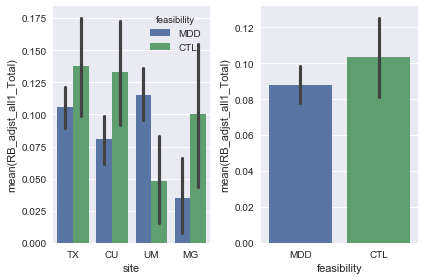

In [10]:
# Group x site x block anova
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=False)

total_rb_plot_site = sns.barplot(y='RB_adjst_all1_Total', x = 'site', hue = 'feasibility',
                                   data = embarc_standard_df, ci=68, ax = ax1)
total_rb_plot = sns.barplot(y='RB_adjst_all1_Total', x = 'feasibility', 
                                   data = embarc_standard_df, ci=68, ax = ax2)
f.tight_layout()
%Rpush prt_params_df
%R rb.aov <- aov_ez("ProjectSpecificID", dv = "response_bias", \
                                 data = prt_params_df, within = "block", \
                                 between = c("group", "site"),anova_table=list(correction="GG", es = "pes"))
%R print(rb.aov)

Both groups developed a response bias. 

In [177]:
# The MDDs developed a response bias

embarc_standard_mdd = embarc_standard_df[embarc_standard_df.feasibility == 'MDD']

%Rpush embarc_standard_mdd
%R rb_mdd.test <- t.test(embarc_standard_mdd$RB_adjst_all1_Total, mu=0, alternative="greater")
%R print (rb_mdd.test)


	One Sample t-test

data:  embarc_standard_mdd$RB_adjst_all1_Total
t = 8.6657, df = 257, p-value = 2.553e-16
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 0.07110494        Inf
sample estimates:
 mean of x 
0.08783799 



In [178]:
# the controls also developed a response bias

embarc_standard_ctl = embarc_standard_df[embarc_standard_df.feasibility == 'CTL']

%Rpush embarc_standard_ctl
%R rb_ctl.test <- t.test(embarc_standard_ctl$RB_adjst_all1_Total, mu=0, alternative="greater")
%R print (rb_ctl.test)


	One Sample t-test

data:  embarc_standard_ctl$RB_adjst_all1_Total
t = 4.6747, df = 35, p-value = 2.134e-05
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 0.06596412        Inf
sample estimates:
mean of x 
0.1032996 



Total response bias doesn't correlate with depression severity or anhedonia. 


	Pearson's product-moment correlation

data:  embarc_standard_mdd$shaps_total_continuous and embarc_standard_mdd$RB_adjst_all1_Total
t = 1.2325, df = 255, p-value = 0.2189
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04583955  0.19745841
sample estimates:
       cor 
0.07695493 




	Pearson's product-moment correlation

data:  embarc_standard_mdd$qids_eval_total and embarc_standard_mdd$RB_adjst_all1_Total
t = -0.31341, df = 256, p-value = 0.7542
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1413714  0.1027865
sample estimates:
        cor 
-0.01958446 



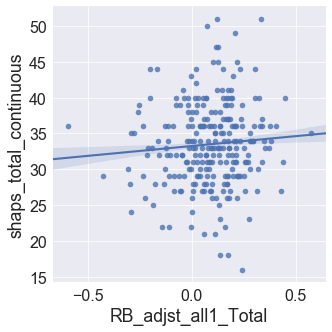

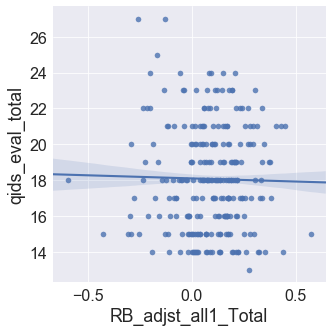

In [89]:
# Correlations with clinical measures

embarc_standard_mdd = embarc_standard_df.loc[embarc_standard_df['feasibility'] == 'MDD']
rl_mdd_shaps = sns.lmplot(y='shaps_total_continuous', \
                                   x = 'RB_adjst_all1_Total',data=embarc_standard_mdd,ci=68)
rl_mdd_quids = sns.lmplot(y='qids_eval_total', \
                                   x = 'RB_adjst_all1_Total', data=embarc_standard_mdd,ci=68)

%Rpush embarc_standard_mdd
%R reward_learning_shaps <- cor.test(embarc_standard_mdd$shaps_total_continuous,embarc_standard_mdd$RB_adjst_all1_Total,method="pearson")
%R print (reward_learning_shaps)

%R reward_learning_shaps <- cor.test(embarc_standard_mdd$qids_eval_total,embarc_standard_mdd$RB_adjst_all1_Total,method="pearson")
%R print (reward_learning_shaps)

In [191]:
# adding discriminability as a covariate doesn't change the results, but disc is significant.

%Rpush embarc_standard_forR
%R embarc_rb_total.aov <- aov_ez("ProjectSpecificID", dv = "RB_adjst_all1_Total", data = embarc_standard_forR, \
                              between = c("feasibility","site"),factorize=FALSE, covariate = 'dis_adjst_all1_Total',\
                              anova_table=list(correction="GG", es = "pes"))
%R print (embarc_rb_total.aov)

Anova Table (Type 3 tests)

Response: RB_adjst_all1_Total
                Effect     df  MSE       F  pes p.value
1          feasibility 1, 285 0.02    1.13 .004     .29
2                 site 3, 285 0.02    0.45 .005     .72
3 dis_adjst_all1_Total 1, 285 0.02 8.67 **  .03    .003
4     feasibility:site 3, 285 0.02    1.22  .01     .30


**Block 2 Response Bias - Block 1 Response Bias:** No effect of group

Anova Table (Type 3 tests)

Response: RB_adjst_all_Blk2_minus_Blk1
            Effect     df  MSE    F  pes p.value
1      feasibility 1, 286 0.04 0.31 .001     .58
2             site 3, 286 0.04 0.56 .006     .64
3 feasibility:site 3, 286 0.04 1.25  .01     .29


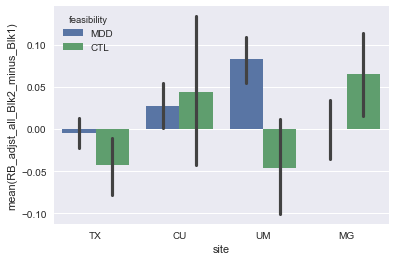

In [11]:
reward_learning_plot = sns.barplot(y='RB_adjst_all_Blk2_minus_Blk1', x = 'site', 
                                   data = embarc_standard_df, hue = 'feasibility', ci=68)
%R reward_learning.aov <- aov_ez("ProjectSpecificID", dv = "RB_adjst_all_Blk2_minus_Blk1", \
                                 data = embarc_standard_forR, \
                                 between = c("feasibility","site"),anova_table=list(correction="GG", es = "pes"))
%R print (reward_learning.aov)

In [189]:
# no change from adding discriminability as a covariate

%R reward_learning.aov <- aov_ez("ProjectSpecificID", dv = "RB_adjst_all_Blk2_minus_Blk1", \
                                 data = embarc_standard_forR, covariate = 'dis_adjst_all1_Total',factorize = FALSE,\
                                 between = c("feasibility","site"),anova_table=list(correction="GG", es = "pes"))
%R print (reward_learning.aov)

Anova Table (Type 3 tests)

Response: RB_adjst_all_Blk2_minus_Blk1
                Effect     df  MSE    F   pes p.value
1          feasibility 1, 285 0.04 0.27 .0010     .60
2                 site 3, 285 0.04 0.57  .006     .63
3 dis_adjst_all1_Total 1, 285 0.04 0.08 .0003     .78
4     feasibility:site 3, 285 0.04 1.25   .01     .29


Block 2 minus Block 1 Response bias doesn't correlate with anhedonia or depression severity. 


	Pearson's product-moment correlation

data:  embarc_standard_mdd$shaps_total_continuous and embarc_standard_mdd$RB_adjst_all_Blk2_minus_Blk1
t = 0.37458, df = 255, p-value = 0.7083
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09919653  0.14539656
sample estimates:
       cor 
0.02345095 




	Pearson's product-moment correlation

data:  embarc_standard_mdd$qids_eval_total and embarc_standard_mdd$RB_adjst_all_Blk2_minus_Blk1
t = 1.1039, df = 256, p-value = 0.2707
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05374551  0.18936461
sample estimates:
       cor 
0.06883135 



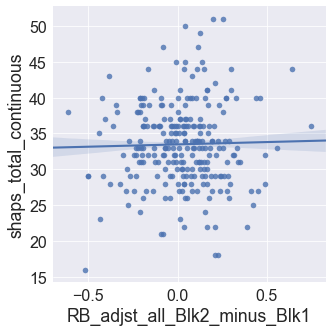

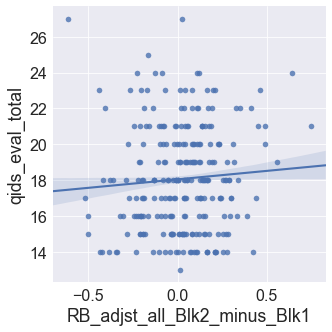

In [90]:
# Correlations with clinical measures

embarc_standard_mdd = embarc_standard_df.loc[embarc_standard_df['feasibility'] == 'MDD']
rl_mdd_shaps = sns.lmplot(y='shaps_total_continuous', \
                                   x = 'RB_adjst_all_Blk2_minus_Blk1',data=embarc_standard_mdd,ci=68)
rl_mdd_quids = sns.lmplot(y='qids_eval_total', \
                                   x = 'RB_adjst_all_Blk2_minus_Blk1', data=embarc_standard_mdd,ci=68)

%Rpush embarc_standard_mdd
%R reward_learning_shaps <- cor.test(embarc_standard_mdd$shaps_total_continuous,embarc_standard_mdd$RB_adjst_all_Blk2_minus_Blk1,method="pearson")
%R print (reward_learning_shaps)

%R reward_learning_shaps <- cor.test(embarc_standard_mdd$qids_eval_total,embarc_standard_mdd$RB_adjst_all_Blk2_minus_Blk1,method="pearson")
%R print (reward_learning_shaps)

## Discriminability

Controls have higher discriminability (p = 0.6)

Anova Table (Type 3 tests)

Response: discriminability
                  Effect     df  MSE      F    pes p.value
1            feasibility 1, 286 0.12 3.38 +    .01     .07
2                   site 3, 286 0.12   1.53    .02     .21
3       feasibility:site 3, 286 0.12   0.06  .0006     .98
4                  block 1, 286 0.02   0.58   .002     .45
5      feasibility:block 1, 286 0.02   0.00 <.0001     .96
6             site:block 3, 286 0.02   0.19   .002     .90
7 feasibility:site:block 3, 286 0.02   1.55    .02     .20

Sphericity correction method: GG 


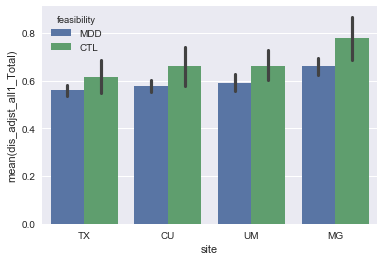

In [25]:
# ANOVA with block included

reward_learning_plot = sns.barplot(y='dis_adjst_all1_Total', x = 'site', 
                                   data = embarc_standard_df, hue = 'feasibility', ci=68)
%Rpush prt_params_df
%R discriminability.aov <- aov_ez("ProjectSpecificID", dv = "discriminability", \
                                 data = prt_params_df, within = 'block',\
                                 between = c("feasibility","site"),anova_table=list(correction="GG", es = "pes"))
%R print (discriminability.aov)

In [193]:
# show the group means

embarc_standard_df.groupby('feasibility').dis_adjst_all1_Total.mean()

feasibility
CTL    0.676452
MDD    0.587865
Name: dis_adjst_all1_Total, dtype: float64

Discriminability doesn't correlate with anhedonia or depression severity.


	Pearson's product-moment correlation

data:  embarc_standard_mdd$shaps_total_continuous and embarc_standard_mdd$dis_adjst_all1_Total
t = 1.4316, df = 255, p-value = 0.1535
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03343696  0.20936652
sample estimates:
       cor 
0.08929121 




	Pearson's product-moment correlation

data:  embarc_standard_mdd$qids_eval_total and embarc_standard_mdd$dis_adjst_all1_Total
t = -1.0261, df = 256, p-value = 0.3058
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.18468176  0.05858278
sample estimates:
        cor 
-0.06400017 



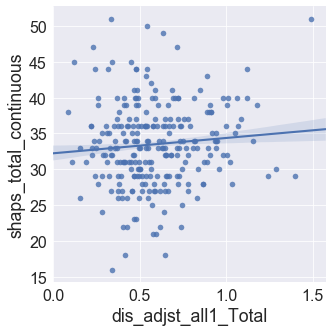

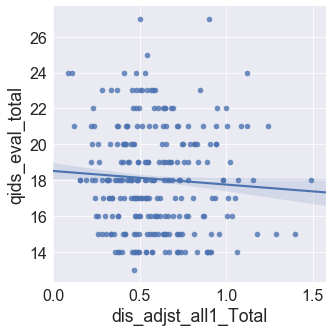

In [91]:
# Correlations with clinical measures

embarc_standard_mdd = embarc_standard_df.loc[embarc_standard_df['feasibility'] == 'MDD']
rl_mdd_shaps = sns.lmplot(y='shaps_total_continuous', \
                                   x = 'dis_adjst_all1_Total',data=embarc_standard_mdd,ci=68)
rl_mdd_quids = sns.lmplot(y='qids_eval_total', \
                                   x = 'dis_adjst_all1_Total', data=embarc_standard_mdd,ci=68)

%Rpush embarc_standard_mdd
%R reward_learning_shaps <- cor.test(embarc_standard_mdd$shaps_total_continuous,embarc_standard_mdd$dis_adjst_all1_Total,method="pearson")
%R print (reward_learning_shaps)

%R reward_learning_shaps <- cor.test(embarc_standard_mdd$qids_eval_total,embarc_standard_mdd$dis_adjst_all1_Total,method="pearson")
%R print (reward_learning_shaps)

## Response Time

Controls are quicker than MDDs

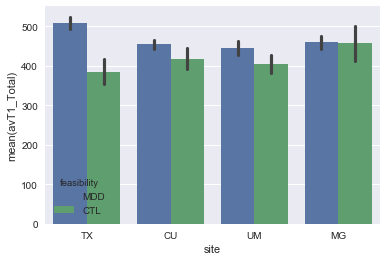

In [196]:
rt_plot = sns.barplot(y='avT1_Total', x = 'site', data=embarc_standard_df, hue = 'feasibility', \
                      ci=68, units = 'ProjectSpecificID')

In [21]:
# ANOVA with block included

%Rpush embarc_trial_forR
%R rt.aov <- aov_ez("subj_idx", dv = "ln_rt", \
                                 data = embarc_trial_forR, within = 'block',\
                                 between = c("feasibility","site"),anova_table=list(correction="GG", es = "pes"))
%R print (rt.aov)

Anova Table (Type 3 tests)

Response: ln_rt
                  Effect     df  MSE      F  pes p.value
1            feasibility 1, 286 0.11 5.59 *  .02     .02
2                   site 3, 286 0.11   0.50 .005     .68
3       feasibility:site 3, 286 0.11   1.51  .02     .21
4                  block 1, 286 0.01   1.32 .005     .25
5      feasibility:block 1, 286 0.01   1.34 .005     .25
6             site:block 3, 286 0.01   1.02  .01     .38
7 feasibility:site:block 3, 286 0.01   0.23 .002     .87

Sphericity correction method: GG 


In [195]:
# print group means

embarc_standard_df.groupby('feasibility').avT1_Total.mean()

feasibility
CTL    414.267521
MDD    471.441132
Name: avT1_Total, dtype: float64

Response time doesn't correlate with depression severity or anhedonia. 


	Pearson's product-moment correlation

data:  embarc_standard_mdd$shaps_total_continuous and embarc_standard_mdd$avT1_Total
t = -1.1787, df = 255, p-value = 0.2396
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.19422552  0.04919378
sample estimates:
        cor 
-0.07361216 




	Pearson's product-moment correlation

data:  embarc_standard_mdd$qids_eval_total and embarc_standard_mdd$avT1_Total
t = -0.31248, df = 256, p-value = 0.7549
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1413144  0.1028440
sample estimates:
       cor 
-0.0195263 



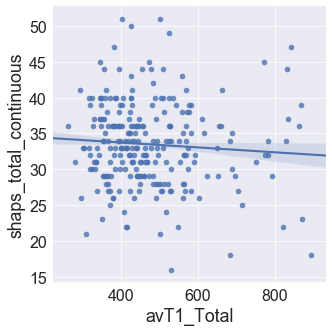

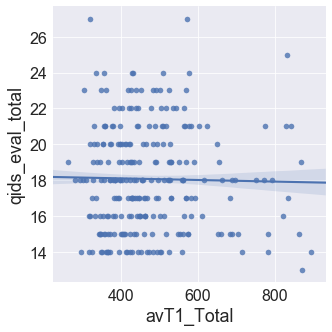

In [92]:
# Correlations with clinical measures

embarc_standard_mdd = embarc_standard_df.loc[embarc_standard_df['feasibility'] == 'MDD']
rl_mdd_shaps = sns.lmplot(y='shaps_total_continuous', \
                                   x = 'avT1_Total',data=embarc_standard_mdd,ci=68)
rl_mdd_quids = sns.lmplot(y='qids_eval_total', \
                                   x = 'avT1_Total', data=embarc_standard_mdd,ci=68)

%Rpush embarc_standard_mdd
%R reward_learning_shaps <- cor.test(embarc_standard_mdd$shaps_total_continuous,embarc_standard_mdd$avT1_Total,method="pearson")
%R print (reward_learning_shaps)

%R reward_learning_shaps <- cor.test(embarc_standard_mdd$qids_eval_total,embarc_standard_mdd$avT1_Total,method="pearson")
%R print (reward_learning_shaps)

## Rewards Recieved

Controls were rewarded significantly more than MDDs, but the means are very close (79 vs 78).

Anova Table (Type 3 tests)

Response: rwdct1_Total
            Effect     df  MSE      F  pes p.value
1      feasibility 1, 286 4.61 4.17 *  .01     .04
2             site 3, 286 4.61   0.28 .003     .84
3 feasibility:site 3, 286 4.61   0.36 .004     .78


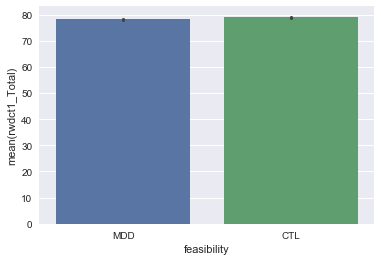

In [198]:
b1_response_bias_plot = sns.barplot(y='rwdct1_Total', x = 'feasibility', 
                                   data = embarc_standard_df, ci=68)
%Rpush embarc_standard_forR
%R embarc_rb_b1.aov <- aov_ez("ProjectSpecificID", dv = "rwdct1_Total", data = embarc_standard_forR, \
                              between = c("feasibility","site"),\
                              anova_table=list(correction="GG", es = "pes"))
%R print (embarc_rb_b1.aov)

In [255]:
rewards_df = embarc_standard_df[['subject', 'site', 'feasibility', 'rhrwd1_Total', 'lnrwd1_Total','rwdct1_Total', \
                                'rwdct1_1','rwdct1_2','rhrwd1_2','RB_adjst_all1_Total','lnrwd1_2','ProjectSpecificID']]

In [256]:
# Melting to do ANOVA with block
rewards = pd.melt(rewards_df, id_vars=['ProjectSpecificID'], value_vars=['rwdct1_1','rwdct1_2'])
rewards['block'] = 0
rewards.loc[rewards.variable == 'rwdct1_1', 'block'] = 1
rewards.loc[rewards.variable == 'rwdct1_2', 'block'] = 2
rewards.rename(columns={'value': 'reward_count_block'}, inplace=True)
rewards_df = rewards.merge(rewards_df, on='ProjectSpecificID')
rewards_df.head()

,ProjectSpecificID,variable,reward_count_block,block,subject,site,feasibility,rhrwd1_Total,lnrwd1_Total,rwdct1_Total,rwdct1_1,rwdct1_2,rhrwd1_2,RB_adjst_all1_Total,lnrwd1_2
0,TX0204,rwdct1_1,39.0,1,204,TX,MDD,58.0,20.0,78.0,39.0,39.0,29.0,-0.058959,10.0
1,TX0204,rwdct1_2,39.0,2,204,TX,MDD,58.0,20.0,78.0,39.0,39.0,29.0,-0.058959,10.0
2,TX0198,rwdct1_1,36.0,1,198,TX,MDD,56.0,20.0,76.0,36.0,40.0,30.0,0.074525,10.0
3,TX0198,rwdct1_2,40.0,2,198,TX,MDD,56.0,20.0,76.0,36.0,40.0,30.0,0.074525,10.0
4,TX0195,rwdct1_1,39.0,1,195,TX,MDD,60.0,18.0,78.0,39.0,39.0,30.0,0.005021,9.0


Significant interaction between block and group on rewards recieved. 

In [260]:
%Rpush rewards_df
%R embarc_rwct.aov <- aov_ez("ProjectSpecificID", dv = "reward_count_block", data = rewards_df, \
                              between = c("feasibility","site"),within='block',\
                              anova_table=list(correction="GG", es = "pes"))
%R print (embarc_rwct.aov)

Anova Table (Type 3 tests)

Response: reward_count_block
                  Effect     df  MSE      F   pes p.value
1            feasibility 1, 286 2.31 4.17 *   .01     .04
2                   site 3, 286 2.31   0.28  .003     .84
3       feasibility:site 3, 286 2.31   0.36  .004     .78
4                  block 1, 286 1.21   0.27 .0009     .60
5      feasibility:block 1, 286 1.21 4.18 *   .01     .04
6             site:block 3, 286 1.21   0.09 .0010     .96
7 feasibility:site:block 3, 286 1.21   0.28  .003     .84

Sphericity correction method: GG 


 feasibility block   lsmean        SE     df lower.CL upper.CL
 CTL         X1    39.54873 0.1734904 563.35 39.20797 39.88950
 MDD         X1    38.87082 0.1253620 391.90 38.62436 39.11729
 CTL         X2    39.19110 0.1734904 563.35 38.85033 39.53186
 MDD         X2    39.08323 0.1253620 391.90 38.83676 39.32969

Results are averaged over the levels of: site 
Confidence level used: 0.95 


 contrast          estimate        SE     df t.ratio p.value
 CTL,X1 - MDD,X1  0.6779129 0.2376898 521.37   2.852  0.0233
 CTL,X1 - CTL,X2  0.3576389 0.2601095 286.00   1.375  0.5161
 CTL,X1 - MDD,X2  0.4655089 0.2376898 521.37   1.958  0.2052
 MDD,X1 - CTL,X2 -0.3202740 0.2376898 521.37  -1.347  0.5331
 MDD,X1 - MDD,X2 -0.2124040 0.1006175 286.00  -2.111  0.1520
 CTL,X2 - MDD,X2  0.1078700 0.2376898 521.37   0.454  0.9689

Results are averaged over the levels of: site 
P value adjustment: tukey method for comparing a family of 4 estimates 


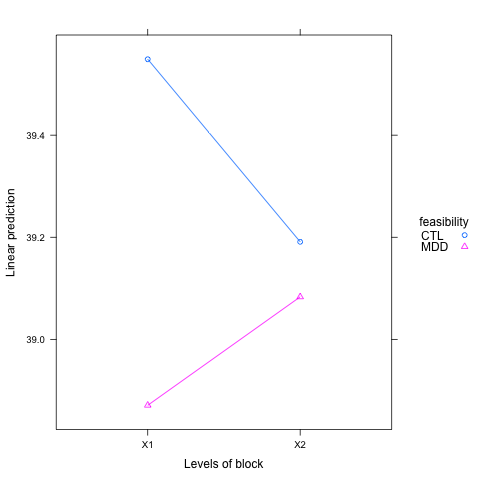

,feasibility,block,.wgt.,lsmean,tvar,xvar
1,CTL,X1,36.0,39.548735,CTL,X1
2,MDD,X1,258.0,38.870822,MDD,X1
3,CTL,X2,36.0,39.191096,CTL,X2
4,MDD,X2,258.0,39.083226,MDD,X2


In [265]:
# follow-up on the interaction with lsmeans
#%R detach(package:lmerTest)
%R library(lsmeans)
%R rwct_group_x_block.lsm <- lsmeans(embarc_rwct.aov, ~ feasibility*block)
%R print(rwct_group_x_block.lsm)
%R print(pairs(rwct_group_x_block.lsm))

# plot the interaction
%R lsmip(rwct_group_x_block.lsm, feasibility ~ block)

### Reward Ratio

In [211]:
rewards_df = embarc_standard_df[['subject', 'site', 'feasibility', 'rhrwd1_Total', 'lnrwd1_Total','rwdct1_Total', \
                                'rhrwd1_1','lnrwd1_1','rhrwd1_2','RB_adjst_all1_Total','lnrwd1_2','ProjectSpecificID']]

In [212]:
rewards_df['reward_ratio_b1'] = rewards_df.rhrwd1_1/rewards_df.lnrwd1_1
rewards_df['reward_ratio_b2'] = rewards_df.rhrwd1_2/rewards_df.lnrwd1_2

In [213]:
rewards_df.head()

,subject,site,feasibility,rhrwd1_Total,lnrwd1_Total,rwdct1_Total,rhrwd1_1,lnrwd1_1,rhrwd1_2,RB_adjst_all1_Total,lnrwd1_2,ProjectSpecificID,reward_ratio_b1,reward_ratio_b2
0,204,TX,MDD,58.0,20.0,78.0,29.0,10.0,29.0,-0.058959,10.0,TX0204,2.900000,2.900000
1,198,TX,MDD,56.0,20.0,76.0,26.0,10.0,30.0,0.074525,10.0,TX0198,2.600000,3.000000
2,195,TX,MDD,60.0,18.0,78.0,30.0,9.0,30.0,0.005021,9.0,TX0195,3.333333,3.333333
3,194,TX,MDD,60.0,20.0,80.0,30.0,10.0,30.0,0.185077,10.0,TX0194,3.000000,3.000000
4,193,TX,MDD,59.0,20.0,79.0,30.0,10.0,29.0,0.060195,10.0,TX0193,3.000000,2.900000


In [214]:
# melting this so we can do the reward ratio regressions with block
rewards = pd.melt(rewards_df, id_vars=['ProjectSpecificID'], value_vars=['reward_ratio_b1','reward_ratio_b2'])
rewards['block'] = 0
rewards.loc[rewards.variable == 'reward_ratio_b1', 'block'] = 1
rewards.loc[rewards.variable == 'reward_ratio_b2', 'block'] = 2
rewards.rename(columns={'value': 'reward_ratio'}, inplace=True)
rewards_df = rewards.merge(rewards_df, on='ProjectSpecificID')
rewards_df.head()

,ProjectSpecificID,variable,reward_ratio,block,subject,site,feasibility,rhrwd1_Total,lnrwd1_Total,rwdct1_Total,rhrwd1_1,lnrwd1_1,rhrwd1_2,RB_adjst_all1_Total,lnrwd1_2,reward_ratio_b1,reward_ratio_b2
0,TX0204,reward_ratio_b1,2.900000,1,204,TX,MDD,58.0,20.0,78.0,29.0,10.0,29.0,-0.058959,10.0,2.900000,2.900000
1,TX0204,reward_ratio_b2,2.900000,2,204,TX,MDD,58.0,20.0,78.0,29.0,10.0,29.0,-0.058959,10.0,2.900000,2.900000
2,TX0198,reward_ratio_b1,2.600000,1,198,TX,MDD,56.0,20.0,76.0,26.0,10.0,30.0,0.074525,10.0,2.600000,3.000000
3,TX0198,reward_ratio_b2,3.000000,2,198,TX,MDD,56.0,20.0,76.0,26.0,10.0,30.0,0.074525,10.0,2.600000,3.000000
4,TX0195,reward_ratio_b1,3.333333,1,195,TX,MDD,60.0,18.0,78.0,30.0,9.0,30.0,0.005021,9.0,3.333333,3.333333


In [215]:
# these numbers seem good
rewards_df.reward_ratio.describe()

count    588.000000
mean       2.983056
std        0.163706
min        2.500000
25%        2.900000
50%        3.000000
75%        3.000000
max        3.750000
Name: reward_ratio, dtype: float64

Looks like there's a significant effect of block and an interaction with group and block. There is a higher reward ratio in block 2 and this effect is greater for MDDs. 

Anova Table (Type 3 tests)

Response: reward_ratio
                  Effect     df  MSE         F   pes p.value
1            feasibility 1, 286 0.03      0.27 .0009     .61
2                   site 3, 286 0.03      1.34   .01     .26
3       feasibility:site 3, 286 0.03      0.21  .002     .89
4                  block 1, 286 0.02 11.52 ***   .04   .0008
5      feasibility:block 1, 286 0.02    4.99 *   .02     .03
6             site:block 3, 286 0.02      1.41   .01     .24
7 feasibility:site:block 3, 286 0.02      1.48   .02     .22

Sphericity correction method: GG 


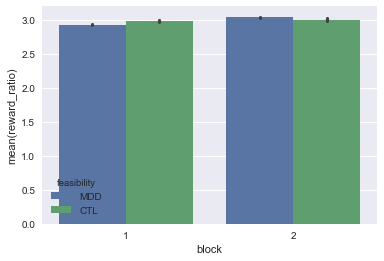

In [216]:
rw_plot = sns.barplot(y='reward_ratio', x = 'block', hue= 'feasibility',
                                   data = rewards_df, ci=68)
%Rpush rewards_df
%R embarc_rew.aov <- aov_ez("ProjectSpecificID", dv = "reward_ratio", data = rewards_df, \
                              within='block',between = c("feasibility", 'site'),\
                              anova_table=list(correction="GG", es = "pes"))
%R print (embarc_rew.aov)

In [78]:
# follow-up on the interaction with lsmeans

%R library(lsmeans)
%R group_x_block.lsm <- lsmeans(embarc_rew.aov, ~ feasibility*block)
%R print(group_x_block.lsm)
%R print(pairs(group_x_block.lsm))

 feasibility block   lsmean         SE     df lower.CL upper.CL
 CTL         X1    2.977246 0.02155734 514.70 2.934895 3.019597
 MDD         X1    2.924543 0.01383536 453.31 2.897354 2.951733
 CTL         X2    3.000085 0.02155734 514.70 2.957734 3.042436
 MDD         X2    3.030350 0.01383536 453.31 3.003160 3.057539

Confidence level used: 0.95 


 contrast           estimate         SE     df t.ratio p.value
 CTL,X1 - MDD,X1  0.05270241 0.02781105 581.61   1.895  0.2313
 CTL,X1 - CTL,X2 -0.02283951 0.03564384 292.00  -0.641  0.9187
 CTL,X1 - MDD,X2 -0.05310385 0.02781105 581.61  -1.909  0.2251
 MDD,X1 - CTL,X2 -0.07554192 0.02781105 581.61  -2.716  0.0343
 MDD,X1 - MDD,X2 -0.10580626 0.01331453 292.00  -7.947  <.0001
 CTL,X2 - MDD,X2 -0.03026435 0.02781105 581.61  -1.088  0.6969

P value adjustment: tukey method for comparing a family of 4 estimates 


In [182]:
# rerunning the follow-up without tukey correction: still no main effect of group. This seems right though the 
# ANOVA also didn't show an effect of group once block was added in. 

%R detach(package:lmerTest)
%R library(lsmeans)
%R group_x_block.lsm <- lsmeans(embarc_rew.aov, ~ feasibility*block, adjust = 'None')
%R print(group_x_block.lsm)
%R print(pairs(group_x_block.lsm))


Error in detach(package:lmerTest) : invalid 'name' argument


 feasibility block   lsmean         SE     df lower.CL upper.CL
 CTL         X1    2.977335 0.02147475 507.64 2.935145 3.019525
 MDD         X1    2.924432 0.01397378 449.97 2.896970 2.951894
 CTL         X2    2.999318 0.02147475 507.64 2.957128 3.041508
 MDD         X2    3.031139 0.01397378 449.97 3.003677 3.058601

Results are averaged over the levels of: site 
Confidence level used: 0.95 


 contrast           estimate         SE     df t.ratio p.value
 CTL,X1 - MDD,X1  0.05290318 0.02786978 568.85   1.898  0.2299
 CTL,X1 - CTL,X2 -0.02198302 0.03536595 286.00  -0.622  0.9251
 CTL,X1 - MDD,X2 -0.05380428 0.02786978 568.85  -1.931  0.2164
 MDD,X1 - CTL,X2 -0.07488621 0.02786978 568.85  -2.687  0.0372
 MDD,X1 - MDD,X2 -0.10670746 0.01368052 286.00  -7.800  <.0001
 CTL,X2 - MDD,X2 -0.03182125 0.02786978 568.85  -1.142  0.6638

Results are averaged over the levels of: site 
P value adjustment: tukey method for comparing a family of 4 estimates 


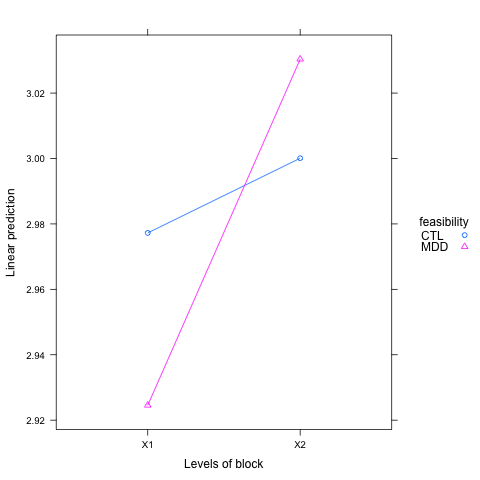

,feasibility,block,.wgt.,lsmean,tvar,xvar
1,CTL,X1,36.0,2.977246,CTL,X1
2,MDD,X1,258.0,2.924543,MDD,X1
3,CTL,X2,36.0,3.000085,CTL,X2
4,MDD,X2,258.0,3.030350,MDD,X2


In [79]:
# plot the interaction

%R library(lsmeans)
%R lsmip(group_x_block.lsm, feasibility ~ block)

### Rewards Recieved & Response Bias

Response bias positively correlates with the number of rewards recieved.


	Pearson's product-moment correlation

data:  embarc_standard_forR$rwdct1_Total and embarc_standard_forR$RB_adjst_all1_Total
t = 2.8917, df = 292, p-value = 0.004119
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05348312 0.27597914
sample estimates:
      cor 
0.1668545 



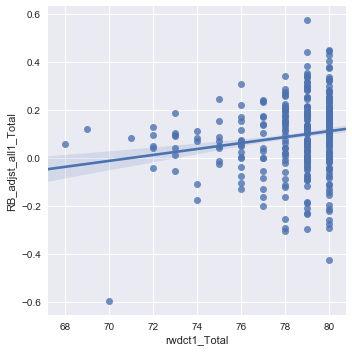

In [200]:
corr_param = sns.lmplot(y='RB_adjst_all1_Total', x = 'rwdct1_Total',\
                        data=embarc_standard_df,ci=68)
%R rl_disc.cor <- cor.test(embarc_standard_forR$rwdct1_Total,embarc_standard_forR$RB_adjst_all1_Total,method="pearson")
%R print (rl_disc.cor) 

In [249]:
# who is that low outlier?

embarc_standard_df[embarc_standard_df.RB_adjst_all1_Total < -.5].ProjectSpecificID

273    MG0125
Name: ProjectSpecificID, dtype: object

In [251]:
# Create a df without this low outlier
embarc_standard_no_mg0125 = embarc_standard_forR[embarc_standard_forR.ProjectSpecificID != 'MG0125']


	Pearson's product-moment correlation

data:  embarc_standard_no_mg0125$rwdct1_Total and embarc_standard_no_mg0125$RB_adjst_all1_Total
t = 1.9952, df = 291, p-value = 0.04695
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.001604405 0.227726691
sample estimates:
      cor 
0.1161706 



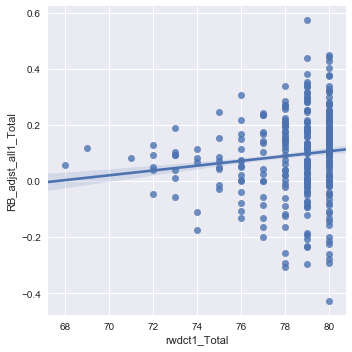

In [252]:
# The correlation is still significant without this person at p = .04

corr_param = sns.lmplot(y='RB_adjst_all1_Total', x = 'rwdct1_Total',\
                        data = embarc_standard_no_mg0125,ci=68)
%Rpush embarc_standard_no_mg0125
%R rl_disc.cor <- cor.test(embarc_standard_no_mg0125$rwdct1_Total,embarc_standard_no_mg0125$RB_adjst_all1_Total,method="pearson")
%R print (rl_disc.cor)

### Rewards Recieved & Discriminability

Discriminability positively correlates with the number of rewards recieved.


	Pearson's product-moment correlation

data:  embarc_standard_forR$rwdct1_Total and embarc_standard_forR$dis_adjst_all1_Total
t = 9.9185, df = 292, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4112209 0.5829172
sample estimates:
      cor 
0.5019989 



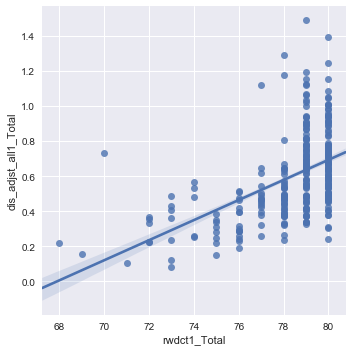

In [201]:
corr_param = sns.lmplot(y='dis_adjst_all1_Total', x = 'rwdct1_Total',\
                        data=embarc_standard_df,ci=68)
%R rl_disc.cor <- cor.test(embarc_standard_forR$rwdct1_Total,embarc_standard_forR$dis_adjst_all1_Total,method="pearson")
%R print (rl_disc.cor) 

**Do these correlations differ significantly?**  
Yes; disc is stronger

In [203]:
%R compare_corr <- cocor (~ rwdct1_Total + dis_adjst_all1_Total | rwdct1_Total + RB_adjst_all1_Total,\
                          embarc_standard_forR)
%R print(compare_corr)


  Results of a comparison of two overlapping correlations based on dependent groups

Comparison between r.jk (rwdct1_Total, dis_adjst_all1_Total) = 0.502 and r.jh (rwdct1_Total, RB_adjst_all1_Total) = 0.1669
Difference: r.jk - r.jh = 0.3351
Related correlation: r.kh = -0.1809
Data: embarc_standard_forR: j = rwdct1_Total, k = dis_adjst_all1_Total, h = RB_adjst_all1_Total
Group size: n = 294
Null hypothesis: r.jk is equal to r.jh
Alternative hypothesis: r.jk is not equal to r.jh (two-sided)
Alpha: 0.05

pearson1898: Pearson and Filon's z (1898)
  z = 4.2564, p-value = 0.0000
  Null hypothesis rejected

hotelling1940: Hotelling's t (1940)
  t = 4.5134, df = 291, p-value = 0.0000
  Null hypothesis rejected

williams1959: Williams' t (1959)
  t = 4.2287, df = 291, p-value = 0.0000
  Null hypothesis rejected

olkin1967: Olkin's z (1967)
  z = 4.2564, p-value = 0.0000
  Null hypothesis rejected

dunn1969: Dunn and Clark's z (1969)
  z = 4.1907, p-value = 0.0000
  Null hypothesis rejected

he

In [148]:
# Regression with RB and disc predicting number of rewards recieved

%R library(lmerTest)
%Rpush embarc_standard_forR

%R num_rewards.lm = lm(rwdct1_Total ~ dis_adjst_all1_Total + RB_adjst_all1_Total + dis_adjst_all1_Total*RB_adjst_all1_Total, embarc_standard_forR)

%R print(summary(num_rewards.lm))


Call:
lm(formula = rwdct1_Total ~ dis_adjst_all1_Total + RB_adjst_all1_Total + 
    dis_adjst_all1_Total * RB_adjst_all1_Total, data = embarc_standard_forR)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3598 -0.7010  0.2725  1.1685  3.5591 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               74.9493     0.3200 234.185  < 2e-16
dis_adjst_all1_Total                       5.0312     0.4526  11.116  < 2e-16
RB_adjst_all1_Total                        6.1072     1.8607   3.282  0.00116
dis_adjst_all1_Total:RB_adjst_all1_Total  -3.4806     2.4034  -1.448  0.14864
                                            
(Intercept)                              ***
dis_adjst_all1_Total                     ***
RB_adjst_all1_Total                      ** 
dis_adjst_all1_Total:RB_adjst_all1_Total    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.771 on 290 degrees of f

In [253]:
# Same regression with low rb outlier removed removed: RB is still significant 

%R library(lmerTest)
%Rpush embarc_standard_no_mg0125

%R num_rewards.lm = lm(rwdct1_Total ~ dis_adjst_all1_Total + RB_adjst_all1_Total + dis_adjst_all1_Total*RB_adjst_all1_Total, embarc_standard_no_mg0125)

%R print(summary(num_rewards.lm))


Call:
lm(formula = rwdct1_Total ~ dis_adjst_all1_Total + RB_adjst_all1_Total + 
    dis_adjst_all1_Total * RB_adjst_all1_Total, data = embarc_standard_no_mg0125)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4159 -0.6566  0.2637  1.1670  3.3751 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                               75.0502     0.3136 239.322  < 2e-16
dis_adjst_all1_Total                       5.0020     0.4420  11.316  < 2e-16
RB_adjst_all1_Total                        5.3963     1.8261   2.955  0.00338
dis_adjst_all1_Total:RB_adjst_all1_Total  -3.3958     2.3470  -1.447  0.14902
                                            
(Intercept)                              ***
dis_adjst_all1_Total                     ***
RB_adjst_all1_Total                      ** 
dis_adjst_all1_Total:RB_adjst_all1_Total    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.729 on 289 degrees

### Response Bias & Discriminability

RB & disc negatively correlate--the better you are at discriminating between the two mouths, the less of a response bias you develop.


	Pearson's product-moment correlation

data:  embarc_standard_forR$dis_adjst_all1_Total and embarc_standard_forR$RB_adjst_all1_Total
t = -3.1438, df = 292, p-value = 0.001839
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.28934502 -0.06795614
sample estimates:
       cor 
-0.1809418 



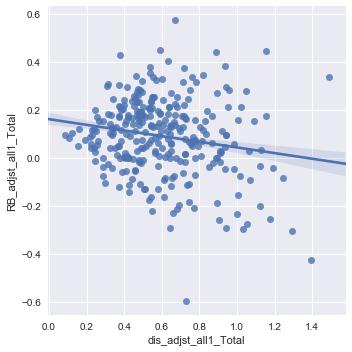

In [202]:
corr_param = sns.lmplot(y='RB_adjst_all1_Total', x = 'dis_adjst_all1_Total',\
                        data=embarc_standard_forR,ci=68)
%R rl_disc.cor <- cor.test(embarc_standard_forR$dis_adjst_all1_Total,embarc_standard_forR$RB_adjst_all1_Total,method="pearson")
%R print (rl_disc.cor) 

### Response time for rich responses is slower when the lean is onscreen vs. the rich.

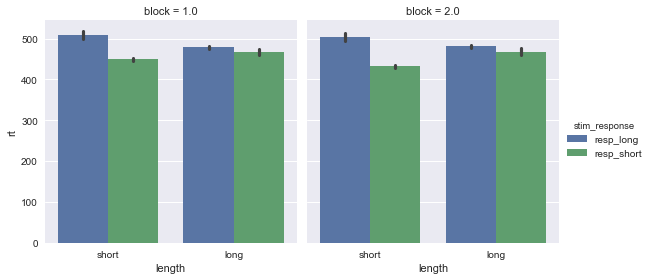

In [43]:
g = sns.factorplot(x = 'length', y='rt', hue='stim_response', col = 'block', \
                   kind = 'bar', data = embarc_trial_df)

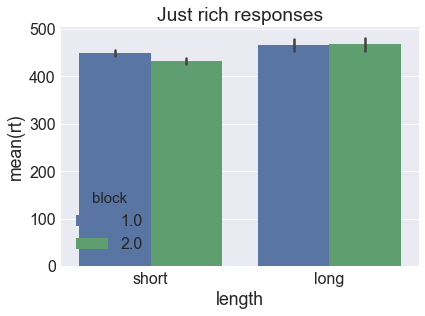

In [48]:
# 'rich' response trials only
sns.set_context("paper", font_scale=2)
rt_plot = sns.barplot(y='rt', x = 'length', 
                                   data = embarc_trial_df[embarc_trial_df.key_press == 'c'], \
                      hue = 'block', units = 'subj_idx', ci=68)
plt.title('Just rich responses')

In [208]:
# when just looking at trials where the participant made the 'rich' response

%R rt.aov <- aov_ez("subj_idx", dv = "ln_rt", data = embarc_rich_resp_only, within = c("length","block"),\
                    anova_table=list(correction="GG", es = "pes"))
%R print (rt.aov)

Anova Table (Type 3 tests)

Response: lm_rt
        Effect     df  MSE         F  pes p.value
1       length 1, 292 0.02 14.21 ***  .05   .0002
2        block 1, 292 0.02 18.68 ***  .06  <.0001
3 length:block 1, 292 0.01      2.29 .008     .13

Sphericity correction method: GG 


In [205]:
# Print means. This effect seems to increase over time.

embarc_trial_df[embarc_trial_df.key_press == 'c'].groupby(['length','block']).rt.mean()

length  block
long    1.0      466.251041
        2.0      467.593096
short   1.0      449.666583
        2.0      432.084215
Name: rt, dtype: float64

In [321]:
# repeat the anova and include all response types

%Rpush embarc_trial_forR
%R rt.aov <- aov_ez("subj_idx", dv = "ln_rt", data = embarc_trial_forR, within = c("length","block",'stim_response'),\
                    anova_table=list(correction="GG", es = "pes"))
%R print (rt.aov)

Anova Table (Type 3 tests)

Response: lm_rt
                      Effect     df  MSE          F   pes p.value
1                     length 1, 289 0.01       2.15  .007     .14
2                      block 1, 289 0.04     5.70 *   .02     .02
3              stim_response 1, 289 0.02 344.13 ***   .54  <.0001
4               length:block 1, 289 0.01     4.50 *   .02     .03
5       length:stim_response 1, 289 0.03  27.18 ***   .09  <.0001
6        block:stim_response 1, 289 0.01  21.08 ***   .07  <.0001
7 length:block:stim_response 1, 289 0.01       0.04 .0002     .83

Sphericity correction method: GG 


In [322]:
# when just looking at trials where the participant made the 'rich' response. Adding group. 

%R rt.aov <- aov_ez("subj_idx", dv = "ln_rt", data = embarc_rich_resp_only, within = c("length","block"),\
                    between = 'feasibility', anova_table=list(correction="GG", es = "pes"))
%R print (rt.aov)

Anova Table (Type 3 tests)

Response: lm_rt
                    Effect     df  MSE       F    pes p.value
1              feasibility 1, 291 0.28  4.76 *    .02     .03
2                   length 1, 291 0.02 7.87 **    .03    .005
3       feasibility:length 1, 291 0.02    0.20  .0007     .66
4                    block 1, 291 0.02  4.82 *    .02     .03
5        feasibility:block 1, 291 0.02    0.73   .002     .40
6             length:block 1, 291 0.01    0.97   .003     .32
7 feasibility:length:block 1, 291 0.01    0.00 <.0001     .99

Sphericity correction method: GG 


In [323]:
# repeat the anova and include all response types

%Rpush embarc_trial_forR
%R rt.aov <- aov_ez("subj_idx", dv = "ln_rt", data = embarc_trial_forR, within = c("length","block",'stim_response'),\
                    between = 'feasibility', anova_table=list(correction="GG", es = "pes"))
%R print (rt.aov)

Anova Table (Type 3 tests)

Response: lm_rt
                                   Effect     df  MSE          F    pes p.value
1                             feasibility 1, 288 0.51     5.83 *    .02     .02
2                                  length 1, 288 0.01       0.88   .003     .35
3                      feasibility:length 1, 288 0.01       0.00 <.0001     .97
4                                   block 1, 288 0.04       1.09   .004     .30
5                       feasibility:block 1, 288 0.04       0.50   .002     .48
6                           stim_response 1, 288 0.02 140.09 ***    .33  <.0001
7               feasibility:stim_response 1, 288 0.02       0.26  .0009     .61
8                            length:block 1, 288 0.01     3.40 +    .01     .07
9                feasibility:length:block 1, 288 0.01       0.35   .001     .55
10                   length:stim_response 1, 288 0.03  14.66 ***    .05   .0002
11       feasibility:length:stim_response 1, 288 0.03       0.28  .0010     

Use lsmeans for follow up tests on stim_response x length interaction.

In [324]:
#%R detach(package:lmerTest) DO THIS IF YOU GET 'NOT A LINEAR MODEL' ERROR--highly annoying

%R library(lsmeans)
%R resp_x_stim.lsm <- lsmeans(rt.aov, ~ length*stim_response)
%R print(resp_x_stim.lsm)
%R print(pairs(resp_x_stim.lsm))

 length stim_response   lsmean         SE     df lower.CL upper.CL
 long   resp_long     6.108952 0.01652298 449.26 6.076480 6.141424
 short  resp_long     6.155578 0.01652298 449.26 6.123106 6.188050
 long   resp_short    6.048910 0.01652298 449.26 6.016438 6.081382
 short  resp_short    6.014486 0.01652298 449.26 5.982014 6.046958

Results are averaged over the levels of: feasibility, block 
Confidence level used: 0.95 


 contrast                              estimate         SE     df t.ratio
 long,resp_long - short,resp_long   -0.04662598 0.01239404 481.34  -3.762
 long,resp_long - long,resp_short    0.06004274 0.01355613 554.53   4.429
 long,resp_long - short,resp_short   0.09446611 0.01068758 542.21   8.839
 short,resp_long - long,resp_short   0.10666872 0.01068758 542.21   9.981
 short,resp_long - short,resp_short  0.14109209 0.01355613 554.53  10.408
 long,resp_short - short,resp_short  0.03442337 0.01239404 481.34   2.777
 p.value
  0.0011
  0.0001
  <.0001
  <.0001
  <.0001
  0.0290

Results are averaged over the levels of: feasibility, block 
P value adjustment: tukey method for comparing a family of 4 estimates 


Use lsmeans for follow up tests on stim_response x block interaction.

In [325]:
#%R detach(package:lmerTest) DO THIS IF YOU GET 'NOT A LINEAR MODEL' ERROR

%R library(lsmeans)
%R block_x_stim.lsm <- lsmeans(rt.aov, ~ block*stim_response)
%R print(block_x_stim.lsm)
%R print(pairs(block_x_stim.lsm))

 block stim_response   lsmean         SE     df lower.CL upper.CL
 X1    resp_long     6.130313 0.01679434 473.71 6.097312 6.163314
 X2    resp_long     6.134218 0.01679434 473.71 6.101217 6.167218
 X1    resp_short    6.046389 0.01679434 473.71 6.013388 6.079389
 X2    resp_short    6.017007 0.01679434 473.71 5.984007 6.050008

Results are averaged over the levels of: feasibility, length 
Confidence level used: 0.95 


 contrast                          estimate         SE     df t.ratio p.value
 X1,resp_long - X2,resp_long   -0.003904657 0.01377593 441.65  -0.283  0.9921
 X1,resp_long - X1,resp_short   0.083924225 0.01067434 541.83   7.862  <.0001
 X1,resp_long - X2,resp_short   0.113305951 0.01483966 518.51   7.635  <.0001
 X2,resp_long - X1,resp_short   0.087828882 0.01483966 518.51   5.919  <.0001
 X2,resp_long - X2,resp_short   0.117210607 0.01067434 541.83  10.981  <.0001
 X1,resp_short - X2,resp_short  0.029381725 0.01377593 441.65   2.133  0.1443

Results are averaged over the levels of: feasibility, length 
P value adjustment: tukey method for comparing a family of 4 estimates 


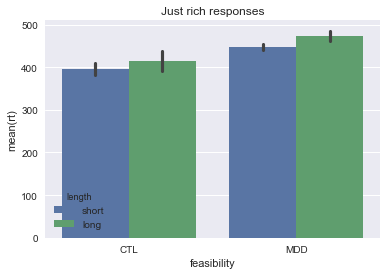

In [183]:
# Plotting just rich responses with group: the MDDs are just slower overall. 

rt_plot = sns.barplot(y='rt', x = 'feasibility', 
                                   data = embarc_rich_resp_only, \
                      hue = 'length', units = 'subj_idx', ci=68)
plt.title('Just rich responses')

Looking at response time with lmer--shows same thing as anova.

In [4]:
%Rpush embarc_trial_forR
%R ln_rt.lmer = lmer(ln_rt ~ block + length + stim_response + (1|subj_idx), data = embarc_trial_forR, REML = F)
%R ln_rt.lmer1 = lmer(ln_rt ~ block + feasibility + length + stim_response + (1|subj_idx), data = embarc_trial_forR, REML = F)

# Result: the model with group added is significantly better
%R test_models.aov <- anova(lm_rt.lmer, lm_rt.lmer1)
%R print(test_models.aov)

Data: embarc_trial_forR
Models:
object: lm_rt ~ block + length + stim_response + (1 | subj_idx)
..1: lm_rt ~ block + feasibility + length + stim_response + (1 | subj_idx)
       Df   AIC   BIC logLik deviance  Chisq Chi Df Pr(>Chisq)   
object  6 26992 27045 -13490    26980                            
..1     7 26987 27050 -13486    26973 6.8206      1   0.009011 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [6]:
# since the one with group is significantly better, compare that one to one with length x key_press

%R ln_rt.lmer2 = lmer(ln_rt ~ block + feasibility + length*stim_response + (1|subj_idx), data = embarc_trial_forR, REML = F)

# Result: second one is signicicantly better
%R test_models.aov <- anova(ln_rt.lmer1, ln_rt.lmer2)
%R print(test_models.aov)

Data: embarc_trial_forR
Models:
object: lm_rt ~ block + feasibility + length + stim_response + (1 | subj_idx)
..1: lm_rt ~ block + feasibility + length * stim_response + (1 | subj_idx)
       Df   AIC   BIC logLik deviance  Chisq Chi Df Pr(>Chisq)    
object  7 26987 27050 -13486    26973                             
..1     8 26956 27028 -13470    26940 32.478      1  1.205e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [7]:
# so print the results of that one
%R print(summary(ln_rt.lmer2))

Linear mixed model fit by maximum likelihood t-tests use Satterthwaite
  approximations to degrees of freedom [lmerMod]
Formula: lm_rt ~ block + feasibility + length * stim_response + (1 | subj_idx)
   Data: embarc_trial_forR

     AIC      BIC   logLik deviance df.resid 
 26956.3  27028.0 -13470.1  26940.3    58012 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.3268 -0.6466 -0.0357  0.5952  5.0088 

Random effects:
 Groups   Name        Variance Std.Dev.
 subj_idx (Intercept) 0.05347  0.2312  
 Residual             0.09093  0.3015  
Number of obs: 58020, groups:  subj_idx, 294

Fixed effects:
                                      Estimate Std. Error         df t value
(Intercept)                          6.043e+00  3.892e-02  3.000e+02 155.265
block                               -1.863e-02  2.504e-03  5.773e+04  -7.441
feasibilityMDD                       1.079e-01  4.132e-02  2.940e+02   2.611
lengthshort                          2.354e-02  4.677e-03  5.775e+04   5.

In [8]:
%R detach(package:lmerTest) #DO THIS IF YOU GET 'NOT A LINEAR MODEL' ERROR

%R library(lsmeans)
%R lmer_length_x_stim.lsm <- lsmeans(ln_rt.lmer2, ~ length*stim_response)
%R print(lmer_length_x_stim.lsm)
%R print(pairs(lmer_length_x_stim.lsm))

 length stim_response   lsmean         SE     df lower.CL upper.CL
 long   resp_long     6.068668 0.02072239 297.58 6.027887 6.109449
 short  resp_long     6.092203 0.02104659 316.64 6.050794 6.133612
 long   resp_short    5.984751 0.02092756 309.54 5.943573 6.025929
 short  resp_short    5.972674 0.02071316 297.05 5.931911 6.013437

Results are averaged over the levels of: feasibility 
Degrees-of-freedom method: satterthwaite 
Confidence level used: 0.95 


 contrast                              estimate          SE       df t.ratio
 long,resp_long - short,resp_long   -0.02353497 0.004676839 57748.04  -5.032
 long,resp_long - long,resp_short    0.08391730 0.004128710 57760.20  20.325
 long,resp_long - short,resp_short   0.09599440 0.002842856 57730.43  33.767
 short,resp_long - long,resp_short   0.10745227 0.005460947 57739.25  19.676
 short,resp_long - short,resp_short  0.11952937 0.004640660 57750.02  25.757
 long,resp_short - short,resp_short  0.01207710 0.004060265 57750.50   2.974
 p.value
  <.0001
  <.0001
  <.0001
  <.0001
  <.0001
  0.0155

Results are averaged over the levels of: feasibility 
P value adjustment: tukey method for comparing a family of 4 estimates 


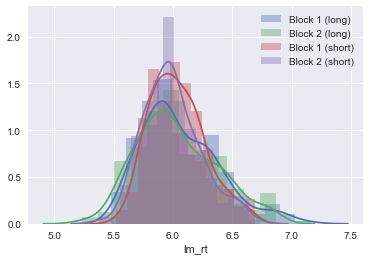

In [215]:
# ln_rt distribution (averaged within subjects)

fig, ax = plt.subplots()
sns.distplot(embarc_trial_df[(embarc_trial_df.key_press == 'c') & (embarc_trial_df.length == 'long') & (embarc_trial_df.block == 1)].groupby('subj_idx').ln_rt.mean(), ax = ax)
sns.distplot(embarc_trial_df[(embarc_trial_df.key_press == 'c') & (embarc_trial_df.length == 'long') & (embarc_trial_df.block == 2)].groupby('subj_idx').ln_rt.mean(), ax = ax)
sns.distplot(embarc_trial_df[(embarc_trial_df.key_press == 'c') & (embarc_trial_df.length == 'short') & (embarc_trial_df.block == 1)].groupby('subj_idx').ln_rt.mean(), ax = ax)
sns.distplot(embarc_trial_df[(embarc_trial_df.key_press == 'c') & (embarc_trial_df.length == 'short') & (embarc_trial_df.block == 2)].groupby('subj_idx').ln_rt.mean(), ax = ax)
a = 'Block 1 (long)'
b = 'Block 2 (long)'
c = 'Block 1 (short)'
d = 'Block 2 (short)'
ax.legend([a,b,c,d], loc=1)

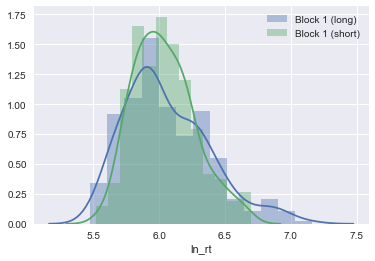

In [187]:
# ln_rt BLOCK 1 distribution (averaged within subjects)

fig, ax = plt.subplots()
sns.distplot(embarc_trial_df[(embarc_trial_df.key_press == 'c') & (embarc_trial_df.length == 'long') & (embarc_trial_df.block == 1)].groupby('subj_idx').ln_rt.mean(), ax = ax)
sns.distplot(embarc_trial_df[(embarc_trial_df.key_press == 'c') & (embarc_trial_df.length == 'short') & (embarc_trial_df.block == 1)].groupby('subj_idx').ln_rt.mean(), ax = ax)
a = 'Block 1 (long)'
c = 'Block 1 (short)'
ax.legend([a,c], loc=1)

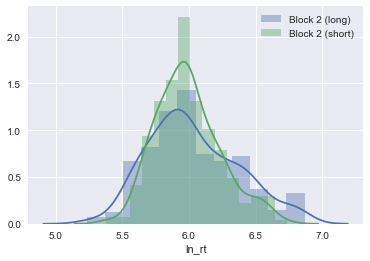

In [188]:
# ln_rt BLOCK 2 distribution (averaged within subjects)

fig, ax = plt.subplots()
sns.distplot(embarc_trial_df[(embarc_trial_df.key_press == 'c') & (embarc_trial_df.length == 'long') & (embarc_trial_df.block == 2)].groupby('subj_idx').ln_rt.mean(), ax = ax)
sns.distplot(embarc_trial_df[(embarc_trial_df.key_press == 'c') & (embarc_trial_df.length == 'short') & (embarc_trial_df.block == 2)].groupby('subj_idx').ln_rt.mean(), ax = ax)
b = 'Block 2 (long)'
d = 'Block 2 (short)'
ax.legend([b,d], loc=1)



**Do accuracy and reaction time correlate?**  
No


	Pearson's product-moment correlation

data:  embarc_standard_forR$avT1_Total and embarc_standard_forR$ac1_Total
t = -0.51912, df = 292, p-value = 0.6041
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.14425651  0.08431971
sample estimates:
        cor 
-0.03036538 



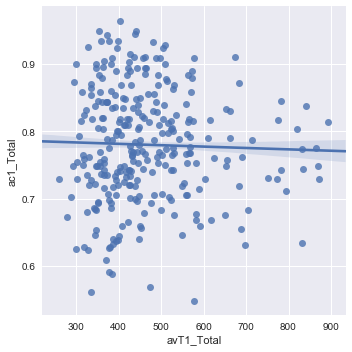

In [218]:
corr_param = sns.lmplot(y='ac1_Total', x = 'avT1_Total',\
                        data=embarc_standard_df,ci=68)
%Rpush embarc_standard_forR
%R rt_acc.cor <- cor.test(embarc_standard_forR$avT1_Total,embarc_standard_forR$ac1_Total,method="pearson")
%R print (rt_acc.cor) 

**Does reaction time predict accuracy? **

In [230]:
%Rpush embarc_trial_forR
%R acc.fm1 <- glmer(response ~ feasibility + block + length + (1|subj_idx), family=binomial, REML = F, data=embarc_trial_forR)
%R acc.fm2 <- glmer(response ~ feasibility + block + length + rt + (1|subj_idx), family=binomial, REML = F, data=embarc_trial_forR)

# use anova to compare the two models: model that includes rt is better
%R test_models_second.aov <- anova(acc.fm1, acc.fm2)
%R print(test_models_second.aov)

Data: embarc_trial_forR
Models:
acc.fm1: response ~ feasibility + block + length + (1 | subj_idx)
acc.fm2: response ~ feasibility + block + length + rt + (1 | subj_idx)
        Df   AIC   BIC logLik deviance  Chisq Chi Df Pr(>Chisq)    
acc.fm1  5 58997 59042 -29494    58987                             
acc.fm2  6 58871 58925 -29430    58859 128.05      1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [231]:
# print the summary of the better model
%R print(summary(acc.fm2))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: response ~ feasibility + block + length + rt + (1 | subj_idx)
   Data: embarc_trial_forR

     AIC      BIC   logLik deviance df.resid 
 58871.1  58924.9 -29429.5  58859.1    58014 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4548  0.3005  0.4524  0.5650  1.3927 

Random effects:
 Groups   Name        Variance Std.Dev.
 subj_idx (Intercept) 0.2599   0.5098  
Number of obs: 58020, groups:  subj_idx, 294

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.686e+00  9.938e-02  16.960  < 2e-16 ***
feasibilityMDD -1.774e-01  9.686e-02  -1.832  0.06700 .  
block          -6.484e-02  2.054e-02  -3.157  0.00159 ** 
lengthshort     4.360e-01  2.071e-02  21.051  < 2e-16 ***
rt             -6.374e-04  5.577e-05 -11.429  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlatio

**Rerunning the above with ln_rt instead of rt.**  
The ln_rt model is only better than the original model at trend level (p = .08); I printed the summary anyway. 

In [232]:
%Rpush embarc_trial_forR
%R acc_lnrt.fm1 <- glmer(response ~ feasibility + block + length + (1|subj_idx), family=binomial, REML = F, data=embarc_trial_forR)
%R acc_lnrt.fm2 <- glmer(response ~ feasibility + block + length + ln_rt + (1|subj_idx), family=binomial, REML = F, data=embarc_trial_forR)

# use anova to compare the two models: model that includes lm_rt is better at trend level
%R test_models_second.aov <- anova(acc_lnrt.fm1, acc_lnrt.fm2)
%R print(test_models_second.aov)

Data: embarc_trial_forR
Models:
acc_lmrt.fm1: response ~ feasibility + block + length + (1 | subj_idx)
acc_lmrt.fm2: response ~ feasibility + block + length + lm_rt + (1 | subj_idx)
             Df   AIC   BIC logLik deviance  Chisq Chi Df Pr(>Chisq)  
acc_lmrt.fm1  5 58997 59042 -29494    58987                           
acc_lmrt.fm2  6 58996 59050 -29492    58984 2.9388      1    0.08648 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [233]:
# print the summary of the lm rt model 
%R print(summary(acc_lnrt.fm2))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: response ~ feasibility + block + length + lm_rt + (1 | subj_idx)
   Data: embarc_trial_forR

     AIC      BIC   logLik deviance df.resid 
 58996.2  59050.0 -29492.1  58984.2    58014 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.4250  0.3048  0.4549  0.5652  1.0176 

Random effects:
 Groups   Name        Variance Std.Dev.
 subj_idx (Intercept) 0.2554   0.5053  
Number of obs: 58020, groups:  subj_idx, 294

Fixed effects:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.73640    0.21396   8.115 4.84e-16 ***
feasibilityMDD -0.20904    0.09615  -2.174   0.0297 *  
block          -0.06281    0.02051  -3.062   0.0022 ** 
lengthshort     0.44634    0.02072  21.546  < 2e-16 ***
lm_rt          -0.05457    0.03179  -1.716   0.0861 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixe

# HDDM

In [79]:
embarc_hddm_data = hddm.load_csv('embarc_prt_data_stim_coded.csv') # load the stimulus coded data w/ hddm

Basic stimulus coded model. The parameters only depend on group (except z: check that this is better). Other models have higher DIC values. 

In [80]:
stim_coding_model = hddm.HDDMStimCoding(embarc_hddm_data, include='z', stim_col='stim', split_param='v', depends_on={'v': 'feasibility', 'a': 'feasibility', 't': 'feasibility', 'z': 'feasibility'})
stim_coding_model.find_starting_values()
stim_coding_model.sample(10000, burn=1000, dbname='embarc_stim_group_bias.db', db='pickle')

 [-----------------100%-----------------] 10001 of 10000 complete in 5492.3 sec

In [259]:
stim_coding_model.dic_info

{'DIC': -10677.278869106111,
 'deviance': -11726.399957789397,
 'pD': 1049.1210886832869}

MDDs have higher decision thresholds than controls.

P_a(MDD > CON) =  0.997888888889
P_a(CON > MDD) =  0.00211111111111


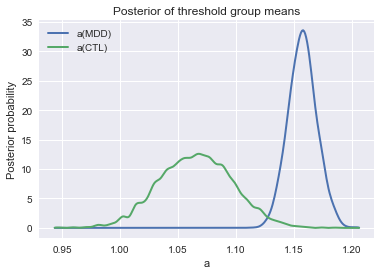

In [257]:
a_MDD, a_CON = stim_coding_model.nodes_db.node[['a(MDD)','a(CTL)']]
hddm.analyze.plot_posterior_nodes([a_MDD, a_CON])
plt.xlabel('a')
plt.ylabel('Posterior probability')
plt.title('Posterior of threshold group means')

print ("P_a(MDD > CON) = ", (a_MDD.trace() > a_CON.trace()).mean())
print ("P_a(CON > MDD) = ", (a_CON.trace() > a_MDD.trace()).mean())

P_t(MDD > CON) =  0.242777777778
P_t(CON > MDD) =  0.757222222222


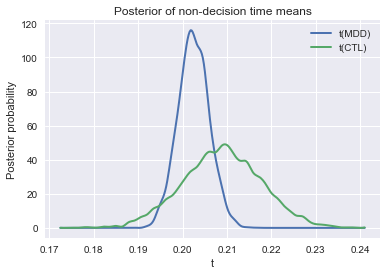

In [81]:
t_MDD, t_CON = stim_coding_model.nodes_db.node[['t(MDD)','t(CTL)']]
hddm.analyze.plot_posterior_nodes([t_MDD, t_CON])
plt.xlabel('t')
plt.ylabel('Posterior probability')
plt.title('Posterior of non-decision time means')

print ("P_t(MDD > CON) = ", (t_MDD.trace() > t_CON.trace()).mean())
print ("P_t(CON > MDD) = ", (t_CON.trace() > t_MDD.trace()).mean())

P_z(MDD > CON) =  0.240777777778
P_z(CON > MDD) =  0.759222222222


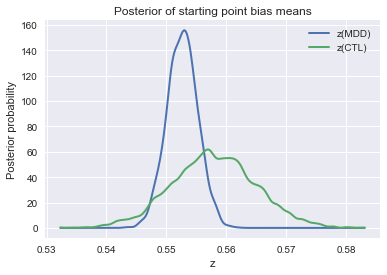

In [82]:
z_MDD, z_CON = stim_coding_model.nodes_db.node[['z(MDD)','z(CTL)']]
hddm.analyze.plot_posterior_nodes([z_MDD, z_CON])
plt.xlabel('z')
plt.ylabel('Posterior probability')
plt.title('Posterior of starting point bias means')

print ("P_z(MDD > CON) = ", (z_MDD.trace() > z_CON.trace()).mean())
print ("P_z(CON > MDD) = ", (z_CON.trace() > z_MDD.trace()).mean())

MDDs have slower drift rates than controls.

P_v(MDD > CON) =  0.000666666666667
P_v(CON > MDD) =  0.999333333333


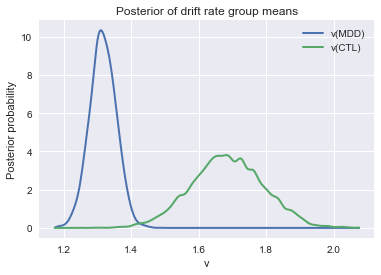

In [258]:
v_MDD, v_CON = stim_coding_model.nodes_db.node[['v(MDD)','v(CTL)']]
hddm.analyze.plot_posterior_nodes([v_MDD, v_CON])
plt.xlabel('v')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift rate group means')

print ("P_v(MDD > CON) = ", (v_MDD.trace() > v_CON.trace()).mean())
print ("P_v(CON > MDD) = ", (v_CON.trace() > v_MDD.trace()).mean())

**Do any of the parameters corrleate with clinical measures?**

In [145]:
prt_params_df = pd.read_csv('embarc_prt_tidy.csv')
del prt_params_df['Unnamed: 0']

No correlations with shaps and a parameter.

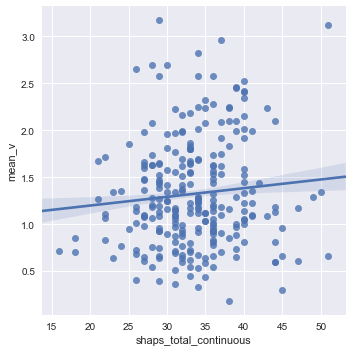

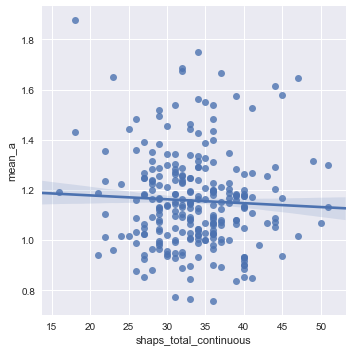

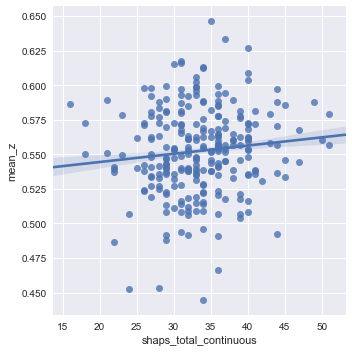

In [141]:
v_shaps = sns.lmplot(y='mean_v', x = 'shaps_total_continuous',\
                        data=prt_params_df[prt_params_df.group == 'MDD'], ci=68)

a_shaps = sns.lmplot(y='mean_a', x = 'shaps_total_continuous',\
                        data=prt_params_df[prt_params_df.group == 'MDD'], ci=68)

z_shaps = sns.lmplot(y='mean_z', x = 'shaps_total_continuous',\
                        data=prt_params_df[prt_params_df.group == 'MDD'], ci=68)

In [146]:
prt_params_df = prt_params_df.merge(embarc_standard_df, on = 'ProjectSpecificID')

No correlations with QIDS and a parameter. 

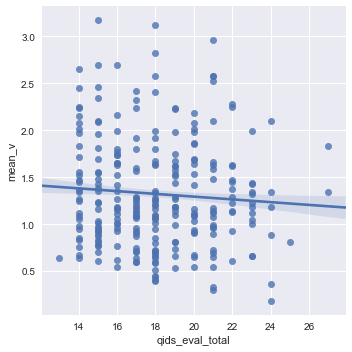

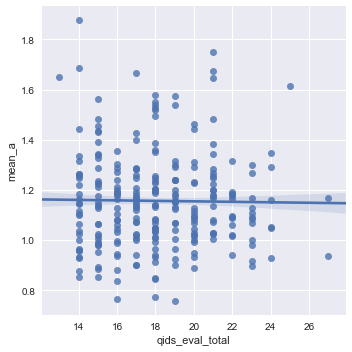

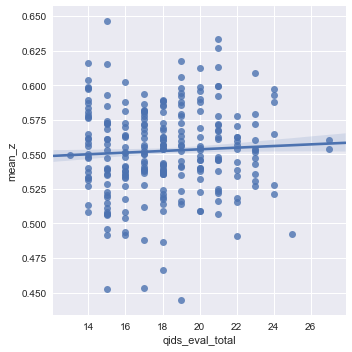

In [147]:
v_shaps = sns.lmplot(y='mean_v', x = 'qids_eval_total',\
                        data=prt_params_df[prt_params_df.group == 'MDD'], ci=68)

a_shaps = sns.lmplot(y='mean_a', x = 'qids_eval_total',\
                        data=prt_params_df[prt_params_df.group == 'MDD'], ci=68)

z_shaps = sns.lmplot(y='mean_z', x = 'qids_eval_total',\
                        data=prt_params_df[prt_params_df.group == 'MDD'], ci=68)

## Response Bias is explained by drift rate and starting point bias

In [3]:
# melting this so we can do the regressions with block
prt_params_df = pd.read_csv('embarc_prt_tidy.csv')
del prt_params_df['Unnamed: 0']
prt_params = pd.melt(prt_params_df, id_vars=['ProjectSpecificID'], value_vars=['RB_adjst_all1_1','RB_adjst_all1_2'])
prt_params['block'] = 0
prt_params.loc[prt_params.variable == 'RB_adjst_all1_1', 'block'] = 1
prt_params.loc[prt_params.variable == 'RB_adjst_all1_2', 'block'] = 2
prt_params.rename(columns={'value': 'response_bias'}, inplace=True)
prt_params_df = prt_params.merge(prt_params_df, on='ProjectSpecificID')
prt_params_df.head()

,ProjectSpecificID,variable,response_bias,block,to_extract,mean_v,group,site,subject,session,...,conmed_11,conmed_06,conmed_01,partic_age,partic_gender,masq2_29,hamd_09,ID_date,mean_a,mean_z
0,CU0009,RB_adjst_all1_1,0.181252,1,v_subj(CTL).CU0009,1.198635,CTL,CU,9,1,...,NaN,NaN,Multivitamin,41,Female,NaN,NaN,CU00092_17_2012,1.354080,0.528960
1,CU0009,RB_adjst_all1_2,0.173448,2,v_subj(CTL).CU0009,1.198635,CTL,CU,9,1,...,NaN,NaN,Multivitamin,41,Female,NaN,NaN,CU00092_17_2012,1.354080,0.528960
2,CU0013,RB_adjst_all1_1,0.028949,1,v_subj(CTL).CU0013,1.091331,CTL,CU,13,1,...,NaN,NaN,NaN,36,Male,2.0,0.0,CU00134_3_2012,1.017125,0.516898
3,CU0013,RB_adjst_all1_2,-0.200873,2,v_subj(CTL).CU0013,1.091331,CTL,CU,13,1,...,NaN,NaN,NaN,36,Male,2.0,0.0,CU00134_3_2012,1.017125,0.516898
4,CU0017,RB_adjst_all1_1,0.148589,1,v_subj(CTL).CU0017,2.964252,CTL,CU,17,1,...,NaN,NaN,NaN,43,Male,2.0,NaN,CU00176_6_2012,0.899351,0.508633


In [10]:
%R library(lmerTest)
%Rpush prt_params_df

# make the model with just group
%R rb_reg1.lm = lm(response_bias ~ site + block + group, data=prt_params_df)
%R rb_reg2.lm = lm(response_bias ~ site + block*group, data=prt_params_df)

# use anova to compare the two models: no difference so top is better
%R test_models.aov <- anova(rb_reg1.lm, rb_reg2.lm)
%R print(test_models.aov)

Analysis of Variance Table

Model 1: response_bias ~ site + block + group
Model 2: response_bias ~ site + block * group
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    582 20.855                           
2    581 20.848  1 0.0066303 0.1848 0.6675


In [11]:
# compare new model with params to the cell above

%R rb_reg3.lm = lm(response_bias ~ site + block + group + mean_v + mean_a + mean_z, data=prt_params_df)

# use anova to compare the two models: new model is better
%R test_models_second.aov <- anova(rb_reg1.lm, rb_reg3.lm)
%R print(test_models_second.aov)

Analysis of Variance Table

Model 1: response_bias ~ site + block + group
Model 2: response_bias ~ site + block + group + mean_v + mean_a + mean_z
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1    582 20.855                                  
2    579 15.244  3    5.6103 71.029 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [12]:
# compare new model with params to the cell above

%R rb_reg4.lm = lm(response_bias ~ site + block + group*mean_v + mean_a + mean_z, data=prt_params_df)

# use anova to compare the two models: no difference so continue with the first one
%R test_models_first.aov <- anova(rb_reg3.lm, rb_reg4.lm)
%R print(test_models_first.aov)

Analysis of Variance Table

Model 1: response_bias ~ site + block + group + mean_v + mean_a + mean_z
Model 2: response_bias ~ site + block + group * mean_v + mean_a + mean_z
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    579 15.244                           
2    578 15.221  1  0.023051 0.8753 0.3499


In [13]:
# compare new model with params to the winning model

%R rb_reg5.lm = lm(response_bias ~ site + block + group*mean_a + mean_v + mean_z, data=prt_params_df)

# use anova to compare the two models: no difference so continue with the first one
%R test_models_first.aov <- anova(rb_reg3.lm, rb_reg5.lm)
%R print(test_models_first.aov)

Analysis of Variance Table

Model 1: response_bias ~ site + block + group + mean_v + mean_a + mean_z
Model 2: response_bias ~ site + block + group * mean_a + mean_v + mean_z
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    579 15.244                           
2    578 15.224  1  0.020267 0.7694 0.3808


In [14]:
# compare new model with params to the winning model

%R rb_reg6.lm = lm(response_bias ~ site + block + group*mean_z + mean_v + mean_a, data=prt_params_df)

# use anova to compare the two models: no difference so the first is the winner (no interactions with group)
%R test_models_first.aov <- anova(rb_reg3.lm, rb_reg6.lm)
%R print(test_models_first.aov)

Analysis of Variance Table

Model 1: response_bias ~ site + block + group + mean_v + mean_a + mean_z
Model 2: response_bias ~ site + block + group * mean_z + mean_v + mean_a
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    579 15.244                           
2    578 15.220  1  0.023934 0.9089 0.3408


In [15]:
# print the winner
%R print(summary(rb_reg3.lm))


Call:
lm(formula = response_bias ~ site + block + group + mean_v + 
    mean_a + mean_z, data = prt_params_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60607 -0.09250 -0.00560  0.09631  0.69426 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.4563933  0.1286070 -11.324  < 2e-16 ***
siteMG      -0.0362609  0.0202687  -1.789   0.0741 .  
siteTX       0.0016544  0.0172983   0.096   0.9238    
siteUM       0.0008002  0.0192572   0.042   0.9669    
block        0.0201967  0.0133831   1.509   0.1318    
groupMDD    -0.0212683  0.0210331  -1.011   0.3124    
mean_v      -0.0755829  0.0122562  -6.167 1.31e-09 ***
mean_a      -0.0169595  0.0376915  -0.450   0.6529    
mean_z       3.0093494  0.2159887  13.933  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1623 on 579 degrees of freedom
Multiple R-squared:  0.2818,	Adjusted R-squared:  0.2719 
F-statistic:  28.4 on 8 and 579 DF,

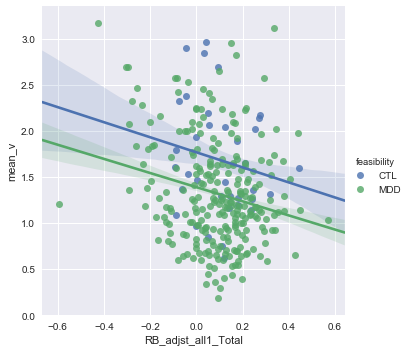

In [139]:
# plotting drift rate and response bias. This is interesting and makes sense, the lower your drift/discriminability, 
# the higher your response bias

corr_param = sns.lmplot(y='mean_v', x = 'RB_adjst_all1_Total', hue='feasibility',\
                        data=prt_params_df[prt_params_df.block == 1],ci=68)

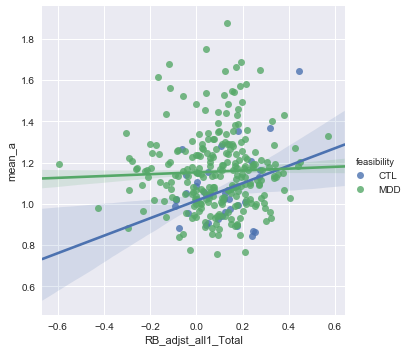

In [140]:
# plotting threshold and response bias

corr_param = sns.lmplot(y='mean_a', x = 'RB_adjst_all1_Total', hue='feasibility',\
                        data=prt_params_df[prt_params_df.block == 1],ci=68)

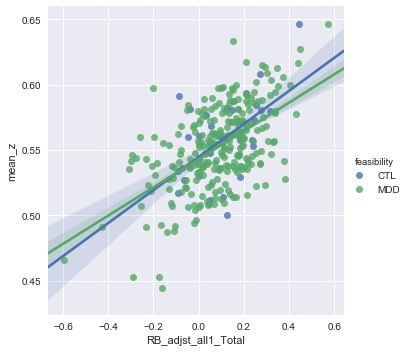

In [141]:
# plotting starting point bias and response bias

corr_param = sns.lmplot(y='mean_z', x = 'RB_adjst_all1_Total', hue='feasibility',\
                        data=prt_params_df[prt_params_df.block == 1],ci=68)

## Discriminability is explained by drift rate and threshold

In [22]:
# melting this so we can do the regressions with block
prt_params_df = pd.read_csv('embarc_prt_tidy.csv')
del prt_params_df['Unnamed: 0']
prt_params = pd.melt(prt_params_df, id_vars=['ProjectSpecificID'], value_vars=['dis_adjst_all1_1','dis_adjst_all1_2'])
prt_params['block'] = 0
prt_params.loc[prt_params.variable == 'dis_adjst_all1_1', 'block'] = 1
prt_params.loc[prt_params.variable == 'dis_adjst_all1_2', 'block'] = 2
prt_params.rename(columns={'value': 'discriminability'}, inplace=True)
prt_params_df = prt_params.merge(prt_params_df, on='ProjectSpecificID')
prt_params_df.head()

,ProjectSpecificID,variable,discriminability,block,to_extract,mean_v,group,site,subject,session,...,conmed_11,conmed_06,conmed_01,partic_age,partic_gender,masq2_29,hamd_09,ID_date,mean_a,mean_z
0,CU0009,dis_adjst_all1_1,0.582176,1,v_subj(CTL).CU0009,1.198635,CTL,CU,9,1,...,NaN,NaN,Multivitamin,41,Female,NaN,NaN,CU00092_17_2012,1.354080,0.528960
1,CU0009,dis_adjst_all1_2,0.661999,2,v_subj(CTL).CU0009,1.198635,CTL,CU,9,1,...,NaN,NaN,Multivitamin,41,Female,NaN,NaN,CU00092_17_2012,1.354080,0.528960
2,CU0013,dis_adjst_all1_1,0.472646,1,v_subj(CTL).CU0013,1.091331,CTL,CU,13,1,...,NaN,NaN,NaN,36,Male,2.0,0.0,CU00134_3_2012,1.017125,0.516898
3,CU0013,dis_adjst_all1_2,0.418001,2,v_subj(CTL).CU0013,1.091331,CTL,CU,13,1,...,NaN,NaN,NaN,36,Male,2.0,0.0,CU00134_3_2012,1.017125,0.516898
4,CU0017,dis_adjst_all1_1,0.984036,1,v_subj(CTL).CU0017,2.964252,CTL,CU,17,1,...,NaN,NaN,NaN,43,Male,2.0,NaN,CU00176_6_2012,0.899351,0.508633


In [17]:
%R library(lmerTest)
%Rpush prt_params_df

# make the model with just group
%R disc_reg1.lm = lm(discriminability ~ site + block + group, data=prt_params_df)
%R disc_reg2.lm = lm(discriminability ~ site + block*group, data=prt_params_df)

# use anova to compare the two models: no difference so take the top
%R test_models.aov <- anova(disc_reg1.lm, disc_reg2.lm)
%R print(test_models.aov)

Analysis of Variance Table

Model 1: discriminability ~ site + block + group
Model 2: discriminability ~ site + block * group
  Res.Df    RSS Df  Sum of Sq      F Pr(>F)
1    582 38.171                            
2    581 38.170  1 0.00043903 0.0067 0.9349


In [18]:
# compare model with parameters to simpler one from above cell

%R disc_reg3.lm = lm(discriminability ~ site + block + group + mean_v + mean_a + mean_z, data=prt_params_df)

# use anova to compare the two models: new model with parameters included is better
%R test_models_second.aov <- anova(disc_reg1.lm, disc_reg3.lm)
%R print(test_models_second.aov)

Analysis of Variance Table

Model 1: discriminability ~ site + block + group
Model 2: discriminability ~ site + block + group + mean_v + mean_a + mean_z
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1    582 38.171                                  
2    579  6.706  3    31.465 905.53 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [53]:
# compare new model to above

%R disc_reg4.lm = lm(discriminability ~ site + block + group*mean_v + mean_a + mean_z, data=prt_params_df)

# use anova to compare the two models: new model is better
%R test_models_second.aov <- anova(disc_reg3.lm, disc_reg4.lm)
%R print(test_models_second.aov)

Analysis of Variance Table

Model 1: discriminability ~ site + block + group + mean_v + mean_a + mean_z
Model 2: discriminability ~ site + block + group * mean_v + mean_a + mean_z
  Res.Df    RSS Df Sum of Sq     F    Pr(>F)    
1    579 6.7062                                 
2    578 6.5805  1   0.12569 11.04 0.0009482 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [54]:
%R disc_reg5.lm = lm(discriminability ~ site + block + group*mean_v + group*mean_a + mean_z, data=prt_params_df)

# use anova to compare the two models: new model is better
%R test_models_second.aov <- anova(disc_reg4.lm, disc_reg5.lm)
%R print(test_models_second.aov)

Analysis of Variance Table

Model 1: discriminability ~ site + block + group * mean_v + mean_a + mean_z
Model 2: discriminability ~ site + block + group * mean_v + group * mean_a + 
    mean_z
  Res.Df    RSS Df Sum of Sq     F   Pr(>F)   
1    578 6.5805                               
2    577 6.4717  1   0.10882 9.702 0.001932 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [55]:
# compare new model to above

%R disc_reg6.lm = lm(discriminability ~ site + block + group*mean_v + group*mean_a + group*mean_z, data=prt_params_df)

# use anova to compare the two models: old model is better
%R test_models_second.aov <- anova(disc_reg5.lm, disc_reg6.lm)
%R print(test_models_second.aov)

Analysis of Variance Table

Model 1: discriminability ~ site + block + group * mean_v + group * mean_a + 
    mean_z
Model 2: discriminability ~ site + block + group * mean_v + group * mean_a + 
    group * mean_z
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    577 6.4717                           
2    576 6.4532  1  0.018548 1.6555 0.1987


In [22]:
# print the summary for the OLD winning model
%R print(summary(disc_reg5.lm))


Call:
lm(formula = discriminability ~ site + block + group * mean_v + 
    group * mean_a + mean_z, data = prt_params_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26011 -0.06714 -0.00815  0.06163  0.48059 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.5763152  0.1186700  -4.856 1.54e-06 ***
siteMG          -0.0001622  0.0132968  -0.012  0.99027    
siteTX          -0.0104696  0.0113347  -0.924  0.35604    
siteUM          -0.0051811  0.0125876  -0.412  0.68079    
block           -0.0167531  0.0087350  -1.918  0.05561 .  
groupMDD         0.1955667  0.1024856   1.908  0.05686 .  
mean_v           0.3648442  0.0210376  17.342  < 2e-16 ***
mean_a           0.6785408  0.0782091   8.676  < 2e-16 ***
mean_z          -0.0911417  0.1417767  -0.643  0.52057    
groupMDD:mean_v  0.0622164  0.0226374   2.748  0.00618 ** 
groupMDD:mean_a -0.2576402  0.0827147  -3.115  0.00193 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

In [24]:
# use lsmeans for follow up tests

%R detach(package:lmerTest)# DO THIS IF YOU GET 'NOT A LINEAR MODEL' ERROR

%R library(lsmeans)
%R group_x_mean_v.lsm <- lsmeans(disc_reg5.lm, ~ group*mean_v)
%R print(group_x_mean_v.lsm)
%R print(pairs(group_x_mean_v.lsm))

 group   mean_v    lsmean          SE  df  lower.CL  upper.CL
 CTL   1.366634 0.6192702 0.015166300 577 0.5894823 0.6490581
 MDD   1.366634 0.6050388 0.004826071 577 0.5955600 0.6145176

Results are averaged over the levels of: site 
Confidence level used: 0.95 


 contrast                                      estimate         SE  df t.ratio
 CTL,1.36663424333333 - MDD,1.36663424333333 0.01423139 0.01593765 577   0.893
 p.value
  0.3723

Results are averaged over the levels of: site 


In [27]:
prt_params_df.mean_v.describe()

count    588.000000
mean       1.366634
std        0.591758
min        0.185468
25%        0.947697
50%        1.255599
75%        1.694944
max        3.170350
Name: mean_v, dtype: float64

In [26]:
# use lsmeans for follow up tests

#%R detach(package:lmerTest)# DO THIS IF YOU GET 'NOT A LINEAR MODEL' ERROR
%R library(lsmeans)
%R group_x_mean_v.lsm <- lsmeans::lstrends(disc_reg5.lm, ~ group, var ="mean_v")
%R print(group_x_mean_v.lsm)
%R print(pairs(group_x_mean_v.lsm))

 group mean_v.trend          SE  df  lower.CL  upper.CL
 CTL      0.3648442 0.021037593 577 0.3235246 0.4061638
 MDD      0.4270605 0.008609398 577 0.4101510 0.4439701

Results are averaged over the levels of: site 
Confidence level used: 0.95 


 contrast     estimate         SE  df t.ratio p.value
 CTL - MDD -0.06221637 0.02263735 577  -2.748  0.0062

Results are averaged over the levels of: site 


In [29]:
# here I just picked mean_v values at the 25th and 75th percentile

%R lsm <- lsmeans(disc_reg5.lm, ~ group|mean_v, at = list(mean_v = c(.94, 1.69)))
%R print(pairs(lsm))    

mean_v = 0.94:
 contrast      estimate         SE  df t.ratio p.value
 CTL - MDD  0.040775027 0.02109725 577   1.933  0.0538

mean_v = 1.69:
 contrast      estimate         SE  df t.ratio p.value
 CTL - MDD -0.005887249 0.01527933 577  -0.385  0.7002

Results are averaged over the levels of: site 


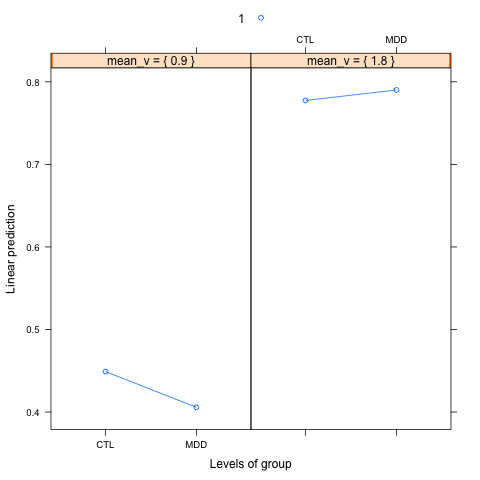

,group,mean_v,.wgt.,lsmean,.single.,tvar,xvar
1,CTL,0.9,72.0,0.449021,1.0,1,CTL
3,CTL,1.8,72.0,0.777381,1.0,1,CTL
2,MDD,0.9,516.0,0.405758,1.0,1,MDD
4,MDD,1.8,516.0,0.790112,1.0,1,MDD


In [32]:
# there must be a better way to do this..

%R lsmip(disc_reg5.lm, ~ group|mean_v, at = list(mean_v = c(.9, 1.8)))

**Same thing with mean_a interaction--there's prob a better way to do this. **

In [33]:
# use lsmeans for follow up tests

#%R detach(package:lmerTest)# DO THIS IF YOU GET 'NOT A LINEAR MODEL' ERROR
%R library(lsmeans)
%R group_x_mean_a.lsm <- lsmeans::lstrends(disc_reg5.lm, ~ group, var ="mean_a")
%R print(group_x_mean_a.lsm)
%R print(pairs(group_x_mean_a.lsm))

 group mean_a.trend         SE  df  lower.CL  upper.CL
 CTL      0.6785408 0.07820911 577 0.5249315 0.8321500
 MDD      0.4209005 0.02605212 577 0.3697320 0.4720691

Results are averaged over the levels of: site 
Confidence level used: 0.95 


 contrast   estimate         SE  df t.ratio p.value
 CTL - MDD 0.2576402 0.08271466 577   3.115  0.0019

Results are averaged over the levels of: site 


In [35]:
# here I just picked mean_a values at the 25th and 75th percentile

%R lsm <- lsmeans(disc_reg5.lm, ~ group|mean_a, at = list(mean_a = c(1, 1.25)))
%R print(pairs(lsm))    

mean_a = 1.00:
 contrast     estimate         SE  df t.ratio p.value
 CTL - MDD -0.02295347 0.01640968 577  -1.399  0.1624

mean_a = 1.25:
 contrast     estimate         SE  df t.ratio p.value
 CTL - MDD  0.04145659 0.02058088 577   2.014  0.0444

Results are averaged over the levels of: site 


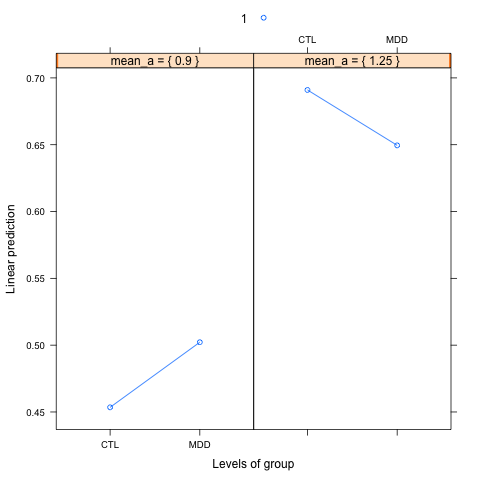

,group,mean_a,.wgt.,lsmean,.single.,tvar,xvar
1,CTL,0.90,72.0,0.453483,1.0,1,CTL
3,CTL,1.25,72.0,0.690972,1.0,1,CTL
2,MDD,0.90,516.0,0.502201,1.0,1,MDD
4,MDD,1.25,516.0,0.649516,1.0,1,MDD


In [36]:
# there must be a better way to do this..

%R lsmip(disc_reg5.lm, ~ group|mean_a, at = list(mean_a = c(.9, 1.25)))

**Try the winning discriminability model for just MDDS, then just CTLS. Looks like drift and threshold matter for both.**

In [39]:
prt_params_mdd = prt_params_df[prt_params_df.group == 'MDD']
%Rpush prt_params_mdd
%R disc_reg_mdd.lm = lm(discriminability ~ site + block + mean_v + mean_a + mean_z, data=prt_params_mdd)

%R print(summary(disc_reg_mdd.lm))


Call:
lm(formula = discriminability ~ site + block + mean_v + mean_a + 
    mean_z, data = prt_params_mdd)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26118 -0.06689 -0.00802  0.06135  0.48468 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.3465716  0.0897134  -3.863 0.000126 ***
siteMG      -0.0008936  0.0143113  -0.062 0.950237    
siteTX      -0.0112919  0.0120316  -0.939 0.348423    
siteUM      -0.0068449  0.0136465  -0.502 0.616175    
block       -0.0173986  0.0093868  -1.854 0.064389 .  
mean_v       0.4275821  0.0086885  49.212  < 2e-16 ***
mean_a       0.4212175  0.0262670  16.036  < 2e-16 ***
mean_z      -0.1518482  0.1512026  -1.004 0.315727    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1066 on 508 degrees of freedom
Multiple R-squared:  0.8331,	Adjusted R-squared:  0.8308 
F-statistic: 362.1 on 7 and 508 DF,  p-value: < 2.2e-16



In [40]:
prt_params_ctl = prt_params_df[prt_params_df.group == 'CTL']
%Rpush prt_params_ctl
%R disc_reg_ctl.lm = lm(discriminability ~ site + block + mean_v + mean_a + mean_z, data=prt_params_ctl)

%R print(summary(disc_reg_ctl.lm))


Call:
lm(formula = discriminability ~ site + block + mean_v + mean_a + 
    mean_z, data = prt_params_ctl)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.245995 -0.053663 -0.005637  0.057952  0.237430 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.860366   0.233825  -3.680 0.000481 ***
siteMG       0.004308   0.036618   0.118 0.906718    
siteTX      -0.006582   0.034784  -0.189 0.850522    
siteUM       0.010568   0.033540   0.315 0.753716    
block       -0.012127   0.024221  -0.501 0.618326    
mean_v       0.361759   0.020708  17.470  < 2e-16 ***
mean_a       0.653942   0.084242   7.763 8.45e-11 ***
mean_z       0.450372   0.426255   1.057 0.294676    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1028 on 64 degrees of freedom
Multiple R-squared:  0.8493,	Adjusted R-squared:  0.8328 
F-statistic: 51.52 on 7 and 64 DF,  p-value: < 2.2e-16



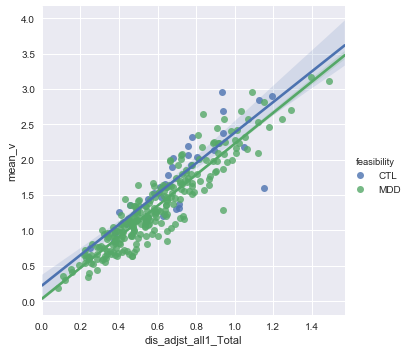

In [127]:
# plotting drift rate and discriminability

corr_param = sns.lmplot(y='mean_v', x = 'dis_adjst_all1_Total', hue='feasibility',\
                        data=prt_params_df[prt_params_df.block == 1],ci=68)

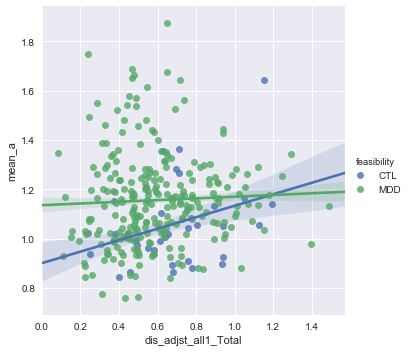

In [128]:
# plotting threshold and discriminability

corr_param = sns.lmplot(y='mean_a', x = 'dis_adjst_all1_Total', hue='feasibility',\
                        data=prt_params_df[prt_params_df.block == 1],ci=68)

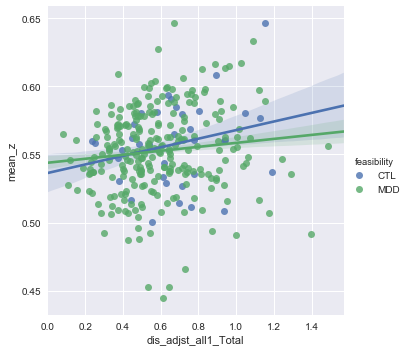

In [129]:
# plotting starting point bias and discriminability

corr_param = sns.lmplot(y='mean_z', x = 'dis_adjst_all1_Total', hue='feasibility',\
                        data=prt_params_df[prt_params_df.block == 1],ci=68)

# SigDep

In [106]:
# load in the data
sigdep_trial_df = pd.read_csv('sigdep_prt_trial_rh.csv')
sigdep_trial_df['ln_rt'] = sigdep_trial_df.time.apply(np.log)
sigdep_trial_df['reward_count'] = sigdep_trial_df.lnrw + sigdep_trial_df.rhrw

In [107]:
sigdep_standard_df = sigdep_trial_df.drop_duplicates('subject')

In [108]:
sigdep_standard_df = sigdep_standard_df[['subject', 'date', 'bias', 'group', 'age', 'sex', 'BDItotal', 'Pure_Anhed', \
                                        'RB_adjst_all1_1', 'RB_adjst_all1_2', 'RB_adjst_all1_3','dis_adjst_all1_1',\
                                        'dis_adjst_all1_2', 'dis_adjst_all1_3', 'reward_ratio_total', 'RB_adjst_all1_4',
                                        'ac1_4', 'avT1_4', 'dis_adjst_all1_4', 'rwdct1_4']]
sigdep_standard_df.reset_index(inplace=True)
del sigdep_standard_df['index']
sigdep_standard_df.head()
sigdep_trial_forR = sigdep_trial_df[['subject','bias', 'short_key', 'long_key', 'trial', 'length', 'time',\
 'key_press','rwdct1_4', 'correct', 'did_reward', 'reward_due', 'short_due', 'long_due', 'outlier',\
 'discriminability', 'response_bias', 'exclude', 'group_numeric','reward_ratio','lnrw','rhrw','reward_count',\
 'group', 'block', 'block_RB', 'block_disc', 'rl_stim', 'rich_key', 'rl_resp', 'ln_rt','reward_ratio_total', 'RB_adjst_all1_4']]

In [132]:
# commas were causing issues in the next cell
sigdep_standard_df.ac1_4 = sigdep_standard_df.ac1_4.astype(str)
sigdep_standard_df.avT1_4 = sigdep_standard_df.avT1_4.astype(str)
sigdep_standard_df.ac1_4 = sigdep_standard_df.ac1_4.apply(lambda x: float(x.split()[0].replace(',', '')))
sigdep_standard_df.avT1_4 = sigdep_standard_df.avT1_4.apply(lambda x: float(x.split()[0].replace(',', '')))

## Participant Characteristics

**Age:** No significant group differences in age. MDDs are older at trend level (p = .08). 

In [255]:
sp.stats.ttest_ind(sigdep_standard_df[(sigdep_standard_df.group == 'CON')]['age'],
                   sigdep_standard_df[(sigdep_standard_df.group == 'MDD')]['age'])

Ttest_indResult(statistic=-1.7955422923915494, pvalue=0.079137946101959081)

In [90]:
print('MDD:')
print(sigdep_standard_df[(sigdep_standard_df.group == 'MDD')]['age'].describe())
print('CTL:')
print(sigdep_standard_df[(sigdep_standard_df.group == 'CON')]['age'].describe())

MDD:
count    23.000000
mean     43.652174
std       9.551814
min      23.000000
25%      37.500000
50%      44.000000
75%      48.500000
max      65.000000
Name: age, dtype: float64
CTL:
count    25.000000
mean     38.360000
std      10.762125
min      22.000000
25%      29.000000
50%      37.000000
75%      48.000000
max      57.000000
Name: age, dtype: float64


**Gender:** No group differences

In [91]:
print (sigdep_standard_df.groupby('group')['sex'].value_counts())

group  sex
CON    m      14
       f      11
MDD    m      13
       f      10
Name: sex, dtype: int64


In [92]:
obs = np.array([[14,11],[13,10]])
chi2, p, dof, expected = sp.stats.chi2_contingency(obs,correction=False)
print ("Chi-square on Gender: chi-square = " + "{:.2f}".format(chi2) + "; df = " + "{:.2f}".format(dof) + \
"; p = " + "{:.2f}".format(p))

Chi-square on Gender: chi-square = 0.00; df = 1.00; p = 0.97


**BDI:** expected group difference.

In [93]:
sp.stats.ttest_ind(sigdep_standard_df[(sigdep_standard_df.group == 'CON')]['BDItotal'],
                   sigdep_standard_df[(sigdep_standard_df.group == 'MDD')]['BDItotal'])

Ttest_indResult(statistic=-15.231369559184518, pvalue=1.3686637658610826e-19)

In [94]:
print('MDD:')
print(sigdep_standard_df[(sigdep_standard_df.group == 'MDD')]['BDItotal'].describe())
print('CTL:')
print(sigdep_standard_df[(sigdep_standard_df.group == 'CON')]['BDItotal'].describe())

MDD:
count    23.000000
mean     32.130435
std       8.661851
min      14.000000
25%      27.500000
50%      30.000000
75%      38.000000
max      47.000000
Name: BDItotal, dtype: float64
CTL:
count    25.000000
mean      3.400000
std       3.593976
min       0.000000
25%       0.000000
50%       2.000000
75%       6.000000
max      11.000000
Name: BDItotal, dtype: float64


Expected group difference in anhedonia. 

In [46]:
sp.stats.ttest_ind(sigdep_standard_df[(sigdep_standard_df.group == 'CON')]['Pure_Anhed'],
                   sigdep_standard_df[(sigdep_standard_df.group == 'MDD')]['Pure_Anhed'])

Ttest_indResult(statistic=-12.830990814472678, pvalue=8.3458639802024166e-17)

In [47]:
print('MDD:')
print(sigdep_standard_df[(sigdep_standard_df.group == 'MDD')]['Pure_Anhed'].describe())
print('CTL:')
print(sigdep_standard_df[(sigdep_standard_df.group == 'CON')]['Pure_Anhed'].describe())

MDD:
count    23.000000
mean      7.782609
std       2.539802
min       3.000000
25%       6.000000
50%       8.000000
75%      10.000000
max      11.000000
Name: Pure_Anhed, dtype: float64
CTL:
count    25.000000
mean      0.720000
std       1.021437
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       4.000000
Name: Pure_Anhed, dtype: float64


## Response Bias/Reward Learning

**Response Bias:** Main effect of group.

Anova Table (Type 3 tests)

Response: block_RB
       Effect          df  MSE      F  pes p.value
1       group       1, 46 0.09 5.89 *  .11     .02
2       block 1.93, 88.90 0.02   0.71  .02     .49
3 group:block 1.93, 88.90 0.02   0.09 .002     .91

Sphericity correction method: GG 


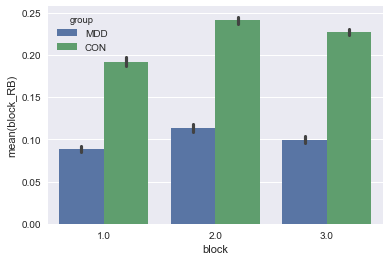

In [98]:
# Block x Group ANOVA

total_rb_plot = sns.barplot(y='block_RB', x = 'block',hue = 'group' ,
                                   data = sigdep_trial_df, ci=68)

%Rpush sigdep_trial_forR
%R rb.aov <- aov_ez("subject", dv = "block_RB", \
                                 data = sigdep_trial_forR, within = "block", \
                                 between = c("group"),anova_table=list(correction="GG", es = "pes"))
%R print(rb.aov)

MDDs developed a response bias. 

In [134]:
sigdep_standard_mdd = sigdep_standard_df[sigdep_standard_df.group == 'MDD']
%Rpush sigdep_stand_mdd
%R rb.test <- t.test(sigdep_stand_mdd$RB_adjst_all1_4, mu=0, alternative="greater")
%R print (rb.test)


	One Sample t-test

data:  sigdep_stand_mdd$RB_adjst_all1_4
t = 2.8424, df = 22, p-value = 0.004737
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 0.03767188        Inf
sample estimates:
mean of x 
0.0951577 



Controls developed a response bias. 

In [135]:
sigdep_standard_ctl = sigdep_standard_df[sigdep_standard_df.group == 'CON']
%Rpush sigdep_stand_ctl
%R rb.test <- t.test(sigdep_stand_ctl$RB_adjst_all1_4, mu=0, alternative="greater")
%R print (rb.test)


	One Sample t-test

data:  sigdep_stand_ctl$RB_adjst_all1_4
t = 6.0184, df = 24, p-value = 1.628e-06
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 0.1558009       Inf
sample estimates:
mean of x 
0.2176822 



Response bias doesn't correlate with BDI or anhedonia. 


	Pearson's product-moment correlation

data:  sigdep_standard_mdd$BDItotal and sigdep_standard_mdd$RB_adjst_all1_4
t = -0.18247, df = 21, p-value = 0.857
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4446963  0.3786245
sample estimates:
        cor 
-0.03978729 




	Pearson's product-moment correlation

data:  sigdep_standard_mdd$Pure_Anhed and sigdep_standard_mdd$RB_adjst_all1_4
t = 0.34236, df = 21, p-value = 0.7355
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3484008  0.4722017
sample estimates:
       cor 
0.07450054 



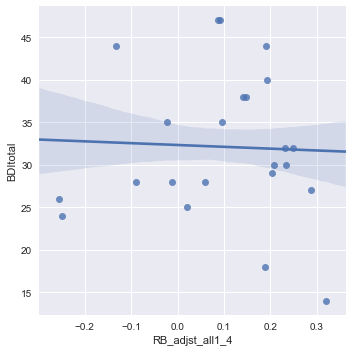

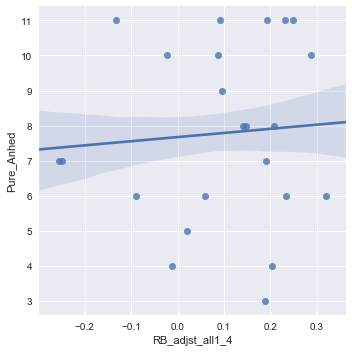

In [125]:
rl_mdd_bdi = sns.lmplot(y='BDItotal', \
                                   x = 'RB_adjst_all1_4',data=sigdep_standard_mdd,ci=68)
rl_mdd_anhed = sns.lmplot(y='Pure_Anhed', \
                                   x = 'RB_adjst_all1_4', data=sigdep_standard_mdd,ci=68)

%Rpush sigdep_standard_mdd
%R rb_bdi <- cor.test(sigdep_standard_mdd$BDItotal,sigdep_standard_mdd$RB_adjst_all1_4,method="pearson")
%R print (rb_bdi)

%R rb_anhed <- cor.test(sigdep_standard_mdd$Pure_Anhed,sigdep_standard_mdd$RB_adjst_all1_4,method="pearson")
%R print (rb_anhed)

## Discriminability

The groups don't significantly differ, but controls have higher discriminability than MDDs. 

Anova Table (Type 3 tests)

Response: block_disc
       Effect          df  MSE    F  pes p.value
1       group       1, 46 0.22 0.38 .008     .54
2       block 1.84, 84.59 0.03 0.54  .01     .57
3 group:block 1.84, 84.59 0.03 0.35 .008     .69

Sphericity correction method: GG 


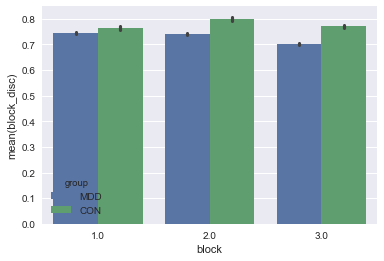

In [99]:
disc_plot = sns.barplot(y='block_disc', x = 'block', data = sigdep_trial_df, hue = 'group', ci=68)

%R discriminability.aov <- aov_ez("subject", dv = "block_disc", \
                                 data = sigdep_trial_forR, within = 'block',\
                                 between = c("group"),anova_table=list(correction="GG", es = "pes"))
%R print (discriminability.aov)

In [67]:
# show the group means. Both groups are higher than the EMBARC sample.

sigdep_trial_df.groupby('group').block_disc.mean()

group
CON    0.777623
MDD    0.727700
Name: block_disc, dtype: float64

Discriminability doesn't correlate with BDI or anhedonia. 


	Pearson's product-moment correlation

data:  sigdep_standard_mdd$BDItotal and sigdep_standard_mdd$dis_adjst_all1_4
t = -1.1847, df = 21, p-value = 0.2494
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6005436  0.1805252
sample estimates:
       cor 
-0.2503028 




	Pearson's product-moment correlation

data:  sigdep_standard_mdd$Pure_Anhed and sigdep_standard_mdd$dis_adjst_all1_4
t = -0.89015, df = 21, p-value = 0.3835
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5589519  0.2404154
sample estimates:
       cor 
-0.1906835 



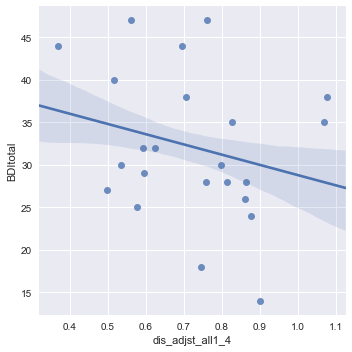

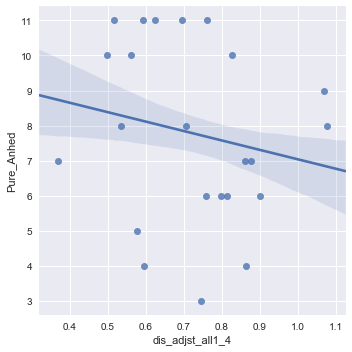

In [124]:
rl_mdd_bdi = sns.lmplot(y='BDItotal', \
                                   x = 'dis_adjst_all1_4',data=sigdep_standard_mdd,ci=68)
rl_mdd_anhed = sns.lmplot(y='Pure_Anhed', \
                                   x = 'dis_adjst_all1_4', data=sigdep_standard_mdd,ci=68)

%Rpush sigdep_standard_mdd
%R disc_bdi <- cor.test(sigdep_standard_mdd$BDItotal,sigdep_standard_mdd$dis_adjst_all1_4,method="pearson")
%R print (disc_bdi)

%R disc_anhed <- cor.test(sigdep_standard_mdd$Pure_Anhed,sigdep_standard_mdd$dis_adjst_all1_4,method="pearson")
%R print (disc_anhed)

## Response Time

Controls are quicker than MDDs.

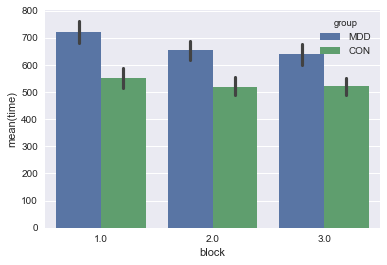

In [70]:
rt_plot = sns.barplot(y='time', x = 'block', data=sigdep_trial_df, hue = 'group', \
                      ci=68, units = 'subject')

In [74]:
%Rpush sigdep_trial_df
%R rt.aov <- aov_ez("subject", dv = "ln_rt", \
                                 data = sigdep_trial_df, within = 'block',\
                                 between = c("group"),anova_table=list(correction="GG", es = "pes"))
%R print (rt.aov)

Anova Table (Type 3 tests)

Response: ln_rt
       Effect          df  MSE        F pes p.value
1       group       1, 46 0.23  7.87 ** .15    .007
2       block 1.68, 77.12 0.01 9.55 *** .17   .0004
3 group:block 1.68, 77.12 0.01     2.06 .04     .14

Sphericity correction method: GG 


In [127]:
# print group means

sigdep_trial_df.groupby('group').ln_rt.mean()

group
CON    6.177146
MDD    6.402601
Name: ln_rt, dtype: float64

In [126]:
# print block means: people got faster over time. 

sigdep_trial_df.groupby('block').ln_rt.mean()

block
1.0    6.330067
2.0    6.266209
3.0    6.259112
Name: ln_rt, dtype: float64

Response time doesn't correlate with BDI or anhedonia. 


	Pearson's product-moment correlation

data:  sigdep_standard_mdd$BDItotal and sigdep_standard_mdd$avT1_4
t = 0.2666, df = 21, p-value = 0.7924
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3628093  0.4592854
sample estimates:
       cor 
0.05807853 




	Pearson's product-moment correlation

data:  sigdep_standard_mdd$Pure_Anhed and sigdep_standard_mdd$avT1_4
t = -0.2005, df = 21, p-value = 0.843
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4478445  0.3752519
sample estimates:
        cor 
-0.04371155 



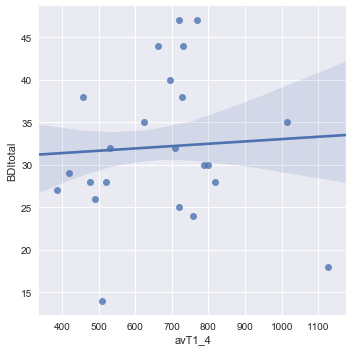

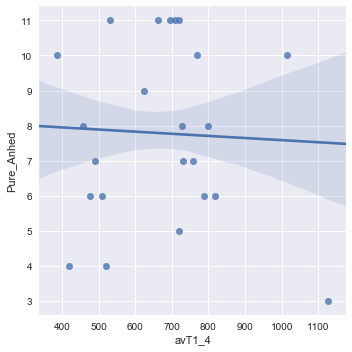

In [136]:
# Correlations with clinical measures

rt_mdd_bdi = sns.lmplot(y='BDItotal', \
                                   x = 'avT1_4',data=sigdep_standard_mdd,ci=68)
rt_mdd_quids = sns.lmplot(y='Pure_Anhed', \
                                   x = 'avT1_4', data=sigdep_standard_mdd,ci=68)

%Rpush sigdep_standard_mdd
%R rt_BDI <- cor.test(sigdep_standard_mdd$BDItotal,sigdep_standard_mdd$avT1_4,method="pearson")
%R print (rt_BDI)

%R rt_anhed <- cor.test(sigdep_standard_mdd$Pure_Anhed,sigdep_standard_mdd$avT1_4,method="pearson")
%R print (rt_anhed)

## Rewards Recieved

No group differences in the number of rewards recieved.

Anova Table (Type 3 tests)

Response: reward_count
       Effect          df  MSE    F  pes p.value
1       group       1, 46 2.20 2.69  .06     .11
2       block 1.70, 78.20 1.53 1.31  .03     .27
3 group:block 1.70, 78.20 1.53 0.31 .007     .70

Sphericity correction method: GG 


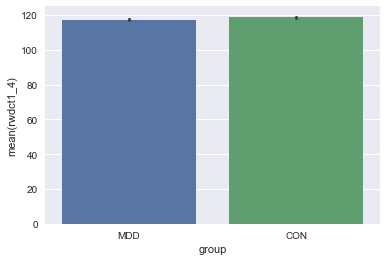

In [240]:
rew_plot = sns.barplot(y='rwdct1_4', x = 'group', 
                                   data = sigdep_trial_df, ci=68, units = 'subject')
%Rpush sigdep_trial_forR
%R embarc_rwct2.aov <- aov_ez("subject", dv = "reward_count", data = sigdep_trial_forR, \
                              between = "group", within = 'block',\
                              anova_table=list(correction="GG", es = "pes"))
%R print (embarc_rwct2.aov)

### Reward Ratio

In [205]:
# these seem fine, but the 2.4 min isn't ideal. Might be just in 1 block. 
sigdep_trial_df.groupby('group').reward_ratio.describe()

group       
CON    count    7383.000000
       mean        3.042020
       std         0.156455
       min         2.600000
       25%         3.000000
       50%         3.000000
       75%         3.000000
       max         3.750000
MDD    count    6776.000000
       mean        2.947701
       std         0.158930
       min         2.400000
       25%         2.900000
       50%         3.000000
       75%         3.000000
       max         3.333333
Name: reward_ratio, dtype: float64

**Controls have significanty higher reward ratios**

Anova Table (Type 3 tests)

Response: reward_ratio
       Effect          df  MSE         F  pes p.value
1       group       1, 46 0.03 13.08 ***  .22   .0007
2       block 1.97, 90.74 0.03      0.41 .009     .67
3 group:block 1.97, 90.74 0.03      0.49  .01     .61

Sphericity correction method: GG 


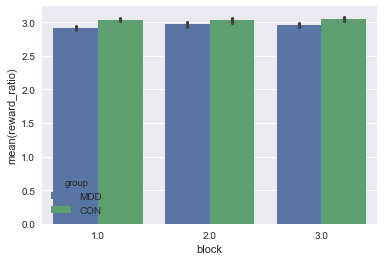

In [208]:
rw_plot = sns.barplot(y='reward_ratio', x = 'block', hue= 'group',
                                   data = sigdep_trial_df, ci=68, units = 'subject')
%Rpush sigdep_trial_forR
%R embarc_rew.aov <- aov_ez("subject", dv = "reward_ratio", data = sigdep_trial_forR, \
                              within='block',between = c("group"),\
                              anova_table=list(correction="GG", es = "pes"))
%R print (embarc_rew.aov)

**So is reward ratio correlated with response bias?**  
Yes. 


	Pearson's product-moment correlation

data:  sigdep_standard_df$reward_ratio_total and sigdep_standard_df$RB_adjst_all1_4
t = 2.4572, df = 46, p-value = 0.01783
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06255083 0.56963406
sample estimates:
      cor 
0.3406315 



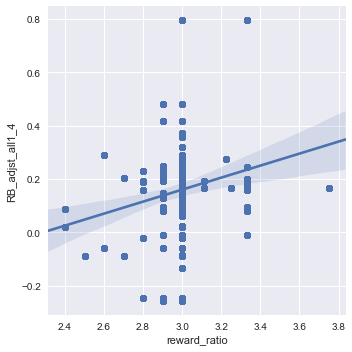

In [261]:
corr_ratio = sns.lmplot(y='RB_adjst_all1_4', x = 'reward_ratio', \
                        data=sigdep_trial_df,ci=68, units = 'subject')
%Rpush sigdep_standard_df
%R rl_ratio <- cor.test(sigdep_standard_df$reward_ratio_total,sigdep_standard_df$RB_adjst_all1_4,method="pearson")
%R print (rl_ratio) 

### Rewards Recieved & Response Bias

Not quite significant but same trend as EMBARC.


	Pearson's product-moment correlation

data:  sigdep_standard_df$rwdct1_4 and sigdep_standard_df$RB_adjst_all1_4
t = 1.152, df = 46, p-value = 0.2553
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1225062  0.4310810
sample estimates:
      cor 
0.1674574 



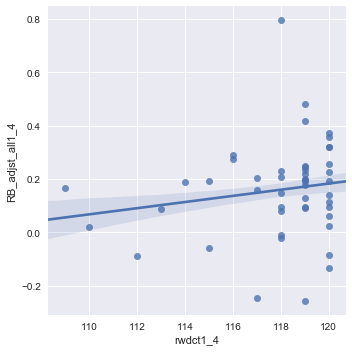

In [112]:
corr_param = sns.lmplot(y='RB_adjst_all1_4', x = 'rwdct1_4',\
                        data=sigdep_standard_df,ci=68)
%Rpush sigdep_standard_df
%R rl_disc.cor <- cor.test(sigdep_standard_df$rwdct1_4,sigdep_standard_df$RB_adjst_all1_4,method="pearson")
%R print (rl_disc.cor) 

### Rewards Recieved & Discriminability

Number of rewards recieved significantly correlates with discriminability. 


	Pearson's product-moment correlation

data:  sigdep_standard_df$rwdct1_4 and sigdep_standard_df$dis_adjst_all1_4
t = 3.09, df = 46, p-value = 0.003392
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1478770 0.6250909
sample estimates:
      cor 
0.4145918 



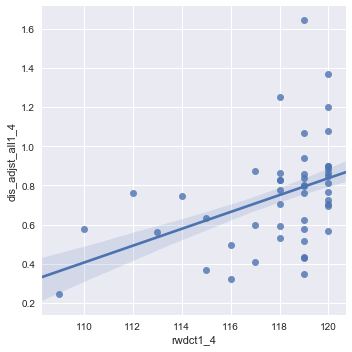

In [113]:
corr_param = sns.lmplot(y='dis_adjst_all1_4', x = 'rwdct1_4',\
                        data=sigdep_standard_df,ci=68)
%Rpush sigdep_standard_df
%R rl_disc.cor <- cor.test(sigdep_standard_df$rwdct1_4,sigdep_standard_df$dis_adjst_all1_4,method="pearson")
%R print (rl_disc.cor) 

**Do the correlations significantly differ?**  


In [302]:
%R compare_corr <- cocor (~ rwdct1_4 + dis_adjst_all1_4 | rwdct1_4 + RB_adjst_all1_4,\
                          sigdep_standard_df)
%R print(compare_corr)


  Results of a comparison of two overlapping correlations based on dependent groups

Comparison between r.jk (rwdct1_4, dis_adjst_all1_4) = 0.4146 and r.jh (rwdct1_4, RB_adjst_all1_4) = 0.1675
Difference: r.jk - r.jh = 0.2471
Related correlation: r.kh = -0.116
Data: sigdep_standard_df: j = rwdct1_4, k = dis_adjst_all1_4, h = RB_adjst_all1_4
Group size: n = 48
Null hypothesis: r.jk is equal to r.jh
Alternative hypothesis: r.jk is not equal to r.jh (two-sided)
Alpha: 0.05

pearson1898: Pearson and Filon's z (1898)
  z = 1.2519, p-value = 0.2106
  Null hypothesis retained

hotelling1940: Hotelling's t (1940)
  t = 1.2556, df = 45, p-value = 0.2157
  Null hypothesis retained

williams1959: Williams' t (1959)
  t = 1.2121, df = 45, p-value = 0.2318
  Null hypothesis retained

olkin1967: Olkin's z (1967)
  z = 1.2519, p-value = 0.2106
  Null hypothesis retained

dunn1969: Dunn and Clark's z (1969)
  z = 1.2040, p-value = 0.2286
  Null hypothesis retained

hendrickson1970: Hendrickson, Stanl

In [115]:
# Regression with RB and disc predicting number of rewards recieved. Looks similar to EMBARC but response bias is 
# just trending not significant. 

%R library(lmerTest)
%Rpush sigdep_standard_df

%R num_rewards.lm <- lm(rwdct1_4 ~ dis_adjst_all1_4 + RB_adjst_all1_4 + dis_adjst_all1_4*RB_adjst_all1_4, sigdep_standard_df)

%R print(summary(num_rewards.lm))


Call:
lm(formula = rwdct1_4 ~ dis_adjst_all1_4 + RB_adjst_all1_4 + 
    dis_adjst_all1_4 * RB_adjst_all1_4, data = sigdep_standard_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7493 -0.8058  0.4886  1.4742  4.0710 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       111.446      2.198  50.707  < 2e-16 ***
dis_adjst_all1_4                    7.541      2.576   2.927  0.00539 ** 
RB_adjst_all1_4                    19.666     11.368   1.730  0.09064 .  
dis_adjst_all1_4:RB_adjst_all1_4  -20.090     13.644  -1.472  0.14802    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.33 on 44 degrees of freedom
Multiple R-squared:  0.2557,	Adjusted R-squared:  0.2049 
F-statistic: 5.037 on 3 and 44 DF,  p-value: 0.004356



### Response Bias & Discriminability

Looks similar to EMBARC but not significant. 


	Pearson's product-moment correlation

data:  sigdep_standard_df$dis_adjst_all1_4 and sigdep_standard_df$RB_adjst_all1_4
t = -0.79199, df = 46, p-value = 0.4324
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3873539  0.1738805
sample estimates:
       cor 
-0.1159845 



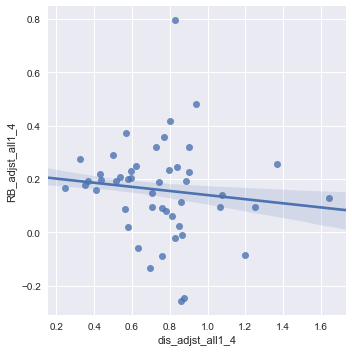

In [104]:
corr_param = sns.lmplot(y='RB_adjst_all1_4', x = 'dis_adjst_all1_4',\
                        data=sigdep_standard_df,ci=68)
%Rpush sigdep_standard_df
%R rl_disc.cor <- cor.test(sigdep_standard_df$dis_adjst_all1_4,sigdep_standard_df$RB_adjst_all1_4,method="pearson")
%R print (rl_disc.cor) 

## Response time for rich responses is slower when the lean is onscreen vs. the rich.

In [7]:
sigdep_rich_resp_only = sigdep_trial_forR[sigdep_trial_forR.rl_resp == 'rich_resp']

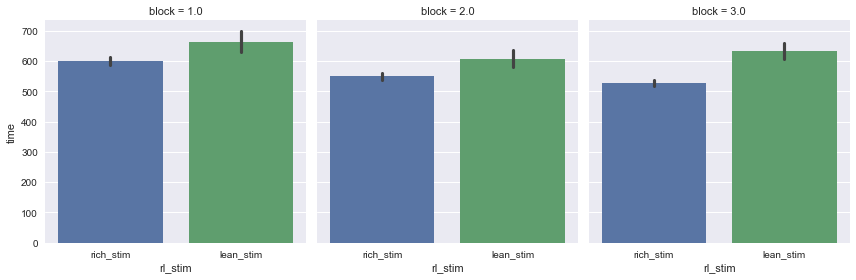

In [14]:
# RICH responses only

g = sns.factorplot(x = 'rl_stim', y='time',  col = 'block', \
                   kind = 'bar', data = sigdep_trial_df[sigdep_trial_df.rl_resp == 'rich_resp'])

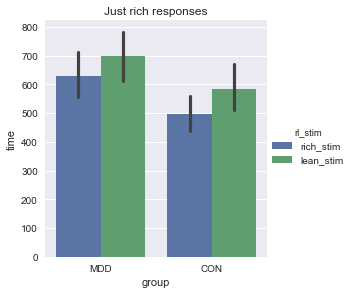

In [81]:
# RICH responses only

g = sns.factorplot(units = 'subject',x = 'group', y='time',  hue = 'rl_stim',\
                   kind = 'bar', data = sigdep_rich_resp_only )
plt.title('Just rich responses')

In [82]:
# when just looking at trials where the participant made the 'rich' response: 
#     MDDs are slower
#     Longer times for lean stima

%Rpush sigdep_rich_resp_only
%R rt.aov <- aov_ez("subject", dv = "ln_rt", data = sigdep_rich_resp_only, between = 'group', within = c("rl_stim", "block"),\
                    anova_table=list(correction="GG", es = "pes"))
%R print (rt.aov)

Anova Table (Type 3 tests)

Response: ln_rt
               Effect          df  MSE         F  pes p.value
1               group       1, 45 0.51    5.10 *  .10     .03
2             rl_stim       1, 45 0.04 35.58 ***  .44  <.0001
3       group:rl_stim       1, 45 0.04      0.68  .01     .41
4               block 1.79, 80.40 0.03   7.04 **  .14    .002
5         group:block 1.79, 80.40 0.03      0.45 .010     .62
6       rl_stim:block 1.93, 86.84 0.01      1.50  .03     .23
7 group:rl_stim:block 1.93, 86.84 0.01      2.09  .04     .13

Sphericity correction method: GG 


In [83]:
# Print means.

sigdep_rich_resp_only.groupby(['rl_stim','block']).ln_rt.mean()

rl_stim    block
lean_stim  1.0      6.339081
           2.0      6.280376
           3.0      6.326659
rich_stim  1.0      6.285402
           2.0      6.210330
           3.0      6.174772
Name: ln_rt, dtype: float64

In [84]:
# repeat the anova and include all response types

%Rpush sigdep_trial_forR
%R rt.aov <- aov_ez("subject", dv = "ln_rt", data = sigdep_trial_forR, within = c("rl_stim","block",'rl_resp'),\
                    between = 'group', anova_table=list(correction="GG", es = "pes"))
%R print (rt.aov)

Anova Table (Type 3 tests)

Response: ln_rt
                        Effect          df  MSE         F  pes p.value
1                        group       1, 41 1.01    6.95 *  .14     .01
2                      rl_stim       1, 41 0.03      2.52  .06     .12
3                group:rl_stim       1, 41 0.03      0.15 .004     .70
4                        block 1.85, 75.93 0.06   5.18 **  .11    .009
5                  group:block 1.85, 75.93 0.06      1.10  .03     .33
6                      rl_resp       1, 41 0.06 14.34 ***  .26   .0005
7                group:rl_resp       1, 41 0.06      0.12 .003     .73
8                rl_stim:block 1.90, 77.79 0.02      1.51  .04     .23
9          group:rl_stim:block 1.90, 77.79 0.02      1.01  .02     .36
10             rl_stim:rl_resp       1, 41 0.05 26.74 ***  .39  <.0001
11       group:rl_stim:rl_resp       1, 41 0.05      0.09 .002     .76
12               block:rl_resp 1.98, 81.34 0.02      0.24 .006     .78
13         group:block:rl_resp 1.

In [85]:
# follow-up on the block effect: is this the best/right way to do this?

#%R detach(package:lmerTest)

%R library(lsmeans)
%R block.lsm <- lsmeans(rt.aov, ~ block)
%R print(block.lsm)
%R print(pairs(block.lsm))

 block   lsmean         SE    df lower.CL upper.CL
 X1    6.377436 0.04419072 51.98 6.288760 6.466111
 X2    6.322792 0.04419072 51.98 6.234116 6.411468
 X3    6.301163 0.04411994 51.67 6.212616 6.389709

Results are averaged over the levels of: group, rl_stim, rl_resp 
Confidence level used: 0.95 


 contrast   estimate         SE df t.ratio p.value
 X1 - X2  0.05464346 0.02345306 88   2.330  0.0569
 X1 - X3  0.07627309 0.02304982 88   3.309  0.0038
 X2 - X3  0.02162963 0.02304982 88   0.938  0.6176

Results are averaged over the levels of: group, rl_stim, rl_resp 
P value adjustment: tukey method for comparing a family of 3 estimates 


In [86]:
# follow-up on the stim x response interaction

#%R detach(package:lmerTest)

%R library(lsmeans)
%R resp_x_stim.lsm <- lsmeans(rt.aov, ~ rl_stim*rl_resp)
%R print(resp_x_stim.lsm)
%R print(pairs(resp_x_stim.lsm))

 rl_stim   rl_resp     lsmean         SE    df lower.CL upper.CL
 lean_stim lean_resp 6.333725 0.04509838 56.23 6.243391 6.424060
 rich_stim lean_resp 6.414803 0.04509838 56.23 6.324468 6.505138
 lean_stim rich_resp 6.357270 0.04509838 56.23 6.266936 6.447605
 rich_stim rich_resp 6.229388 0.04509838 56.23 6.139053 6.319723

Results are averaged over the levels of: group, block 
Confidence level used: 0.95 


 contrast                                     estimate         SE    df t.ratio
 lean_stim,lean_resp - rich_stim,lean_resp -0.08107776 0.02446924 78.79  -3.313
 lean_stim,lean_resp - lean_stim,rich_resp -0.02354493 0.02898997 85.56  -0.812
 lean_stim,lean_resp - rich_stim,rich_resp  0.10433723 0.02567711 75.81   4.063
 rich_stim,lean_resp - lean_stim,rich_resp  0.05753283 0.02567711 75.81   2.241
 rich_stim,lean_resp - rich_stim,rich_resp  0.18541499 0.02898997 85.56   6.396
 lean_stim,rich_resp - rich_stim,rich_resp  0.12788216 0.02446924 78.79   5.226
 p.value
  0.0075
  0.8486
  0.0007
  0.1217
  <.0001
  <.0001

Results are averaged over the levels of: group, block 
P value adjustment: tukey method for comparing a family of 4 estimates 


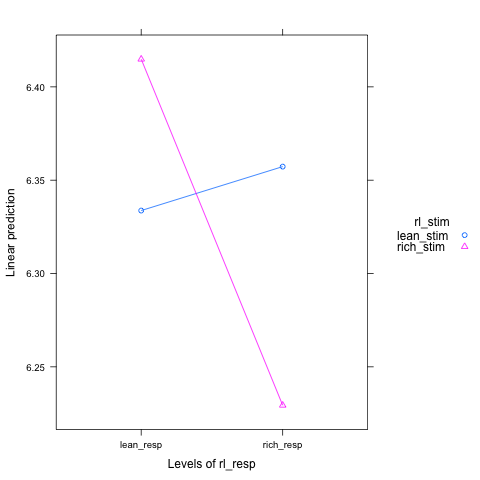

,rl_stim,rl_resp,.wgt.,lsmean,tvar,xvar
1,lean_stim,lean_resp,144.0,6.333725,lean_stim,lean_resp
2,rich_stim,lean_resp,138.0,6.414803,rich_stim,lean_resp
3,lean_stim,rich_resp,143.0,6.357270,lean_stim,rich_resp
4,rich_stim,rich_resp,144.0,6.229388,rich_stim,rich_resp


In [87]:
# plot the resp x stim interaction

%R library(lsmeans)
%R lsmip(resp_x_stim.lsm, rl_stim ~ rl_resp)

Dan, should I do regressions with this or are the anovas enough?

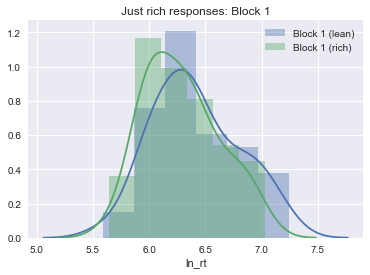

In [91]:
# ln_rt distribution (averaged within subjects)

fig, ax = plt.subplots()
sns.distplot(sigdep_trial_df[(sigdep_trial_df.rl_resp == 'rich_resp') & (sigdep_trial_df.rl_stim == 'lean_stim') & \
                             (sigdep_trial_df.block == 1)].groupby('subject').ln_rt.mean(), ax = ax)
sns.distplot(sigdep_trial_df[(sigdep_trial_df.rl_resp == 'rich_resp') & (sigdep_trial_df.rl_stim == 'rich_stim') & \
                             (sigdep_trial_df.block == 1)].groupby('subject').ln_rt.mean(), ax = ax)
a = 'Block 1 (lean)'
c = 'Block 1 (rich)'
ax.legend([a,c], loc=1)
plt.title('Just rich responses: Block 1')

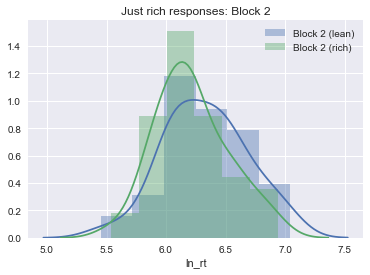

In [90]:
# ln_rt distribution (averaged within subjects)

fig, ax = plt.subplots()
sns.distplot(sigdep_trial_df[(sigdep_trial_df.rl_resp == 'rich_resp') & (sigdep_trial_df.rl_stim == 'lean_stim') & \
                             (sigdep_trial_df.block == 2)].groupby('subject').ln_rt.mean(), ax = ax)
sns.distplot(sigdep_trial_df[(sigdep_trial_df.rl_resp == 'rich_resp') & (sigdep_trial_df.rl_stim == 'rich_stim') & \
                             (sigdep_trial_df.block == 2)].groupby('subject').ln_rt.mean(), ax = ax)
b = 'Block 2 (lean)'
d = 'Block 2 (rich)'
ax.legend([b,d], loc=1)
plt.title('Just rich responses: Block 2')

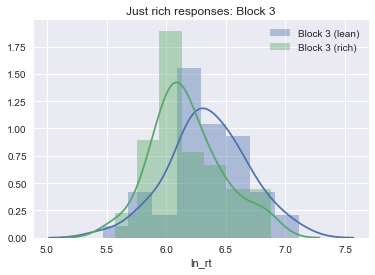

In [89]:
# ln_rt distribution (averaged within subjects)

fig, ax = plt.subplots()
sns.distplot(sigdep_trial_df[(sigdep_trial_df.rl_resp == 'rich_resp') & (sigdep_trial_df.rl_stim == 'lean_stim') & \
                             (sigdep_trial_df.block == 3)].groupby('subject').ln_rt.mean(), ax = ax)
sns.distplot(sigdep_trial_df[(sigdep_trial_df.rl_resp == 'rich_resp') & (sigdep_trial_df.rl_stim == 'rich_stim') & \
                             (sigdep_trial_df.block == 3)].groupby('subject').ln_rt.mean(), ax = ax)
b = 'Block 3 (lean)'
d = 'Block 3 (rich)'
ax.legend([b,d], loc=1)
plt.title('Just rich responses: Block 3')

Accuracy and RT don't correlate. 


	Pearson's product-moment correlation

data:  sigdep_standard_df$avT1_4 and sigdep_standard_df$ac1_4
t = -0.31895, df = 46, p-value = 0.7512
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3267482  0.2403682
sample estimates:
        cor 
-0.04697469 



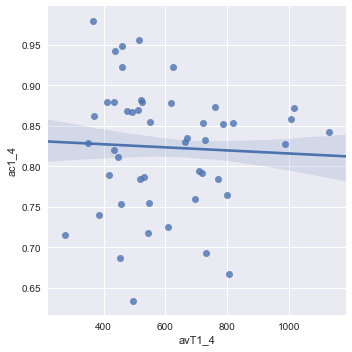

In [79]:
corr_param = sns.lmplot(y='ac1_4', x = 'avT1_4',\
                        data=sigdep_standard_df,ci=68)
%Rpush sigdep_standard_df
%R rt_acc.cor <- cor.test(sigdep_standard_df$avT1_4,sigdep_standard_df$ac1_4,method="pearson")
%R print (rt_acc.cor) 

Reaction time predicts accuracy (negatively?). 

In [94]:
%Rpush sigdep_trial_forR
%R acc_lnrt.fm1 <- glmer(correct ~ group + block + rl_stim + (1|subject), family=binomial, REML = F, data=sigdep_trial_forR)
%R acc_lnrt.fm2 <- glmer(correct ~ group + block + rl_stim + ln_rt + (1|subject), family=binomial, REML = F, data=sigdep_trial_forR)

# use anova to compare the two models: model that includes lm_rt is better
%R test_models_second.aov <- anova(acc_lnrt.fm1, acc_lnrt.fm2)
%R print(test_models_second.aov)

Data: sigdep_trial_forR
Models:
acc_lnrt.fm1: correct ~ group + block + rl_stim + (1 | subject)
acc_lnrt.fm2: correct ~ group + block + rl_stim + ln_rt + (1 | subject)
             Df   AIC   BIC  logLik deviance Chisq Chi Df Pr(>Chisq)    
acc_lnrt.fm1  5 12485 12522 -6237.3    12475                            
acc_lnrt.fm2  6 12409 12455 -6198.6    12397 77.32      1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [95]:
# print the summary of the lm rt model 
%R print(summary(acc_lnrt.fm2))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: correct ~ group + block + rl_stim + ln_rt + (1 | subject)
   Data: sigdep_trial_forR

     AIC      BIC   logLik deviance df.resid 
 12409.3  12454.6  -6198.6  12397.3    14153 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.0389  0.2638  0.3796  0.4909  1.3605 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.3614   0.6012  
Number of obs: 14159, groups:  subject, 48

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       4.81711    0.41965  11.479   <2e-16 ***
groupMDD          0.10192    0.18103   0.563    0.573    
block            -0.03449    0.02798  -1.233    0.218    
rl_stimrich_stim  0.73300    0.04700  15.595   <2e-16 ***
ln_rt            -0.55098    0.06272  -8.785   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fix

## HDDM

Minor changes to make the data work for HDDM.

In [139]:
sigdep_trial_df.loc[sigdep_trial_df.rl_stim == 'rich_stim', 'stim'] = 1
sigdep_trial_df.loc[sigdep_trial_df.rl_stim == 'lean_stim', 'stim'] = 0

In [141]:
sigdep_trial_df.loc[sigdep_trial_df.rl_resp == 'rich_resp', 'response'] = 1
sigdep_trial_df.loc[sigdep_trial_df.rl_resp == 'lean_resp', 'response'] = 0

In [148]:
sigdep_trial_df['rt'] = sigdep_trial_df['time']/1000

In [160]:
sigdep_trial_df['subj_idx'] = sigdep_trial_df['subject']

In [161]:
sigdep_trial_for_ddm = sigdep_trial_df[['subj_idx','response', 'stim','rt', 'group']]

In [162]:
sigdep_trial_for_ddm.to_csv('sigdep_ddm_resp_coded.csv')

In [163]:
sigdep_ddm = hddm.load_csv('sigdep_ddm_resp_coded.csv')

Stimulus coded model where rich is the upper boundary and lean is the lower. 

In [164]:
sigdep_model = hddm.HDDMStimCoding(sigdep_ddm, include='z', stim_col='stim', split_param='v', depends_on={'v': 'group', 'a': 'group', 't': 'group', 'z': 'group'})
sigdep_model.find_starting_values()
sigdep_model.sample(10000, burn=1000, dbname='sigdep_stim_group_bias.db', db='pickle')
sigdep_model.save('sigdep_model')

 [-----------------100%-----------------] 10000 of 10000 complete in 1102.8 sec

In [165]:
sigdep_model.dic_info

{'DIC': 3636.9498320337284,
 'deviance': 3456.8488130246387,
 'pD': 180.10101900908967}

MDDs have higher thresholds than CTLs.

P_a(MDD > CON) =  0.999222222222
P_a(CON > MDD) =  0.000777777777778


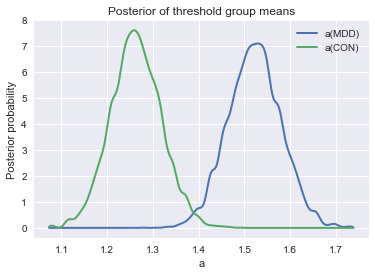

In [168]:
a_MDD, a_CON = sigdep_model.nodes_db.node[['a(MDD)','a(CON)']]
hddm.analyze.plot_posterior_nodes([a_MDD, a_CON])
plt.xlabel('a')
plt.ylabel('Posterior probability')
plt.title('Posterior of threshold group means')

print ("P_a(MDD > CON) = ", (a_MDD.trace() > a_CON.trace()).mean())
print ("P_a(CON > MDD) = ", (a_CON.trace() > a_MDD.trace()).mean())

MDDs and CTLs don't differ in non-decision time. 

P_t(MDD > CON) =  0.462
P_t(CON > MDD) =  0.538


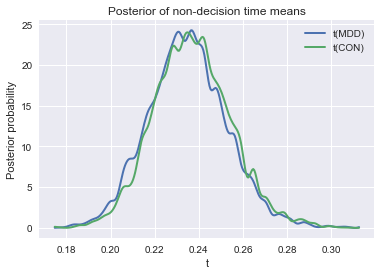

In [169]:
t_MDD, t_CON = sigdep_model.nodes_db.node[['t(MDD)','t(CON)']]
hddm.analyze.plot_posterior_nodes([t_MDD, t_CON])
plt.xlabel('t')
plt.ylabel('Posterior probability')
plt.title('Posterior of non-decision time means')

print ("P_t(MDD > CON) = ", (t_MDD.trace() > t_CON.trace()).mean())
print ("P_t(CON > MDD) = ", (t_CON.trace() > t_MDD.trace()).mean())

MDDs and CTLs don't differ in starting point bias. 

P_z(MDD > CON) =  0.694111111111
P_z(CON > MDD) =  0.305888888889


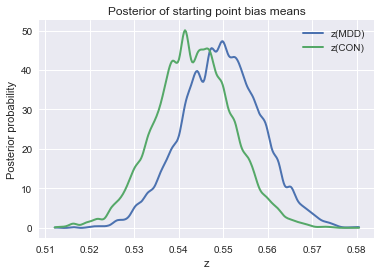

In [170]:
z_MDD, z_CON = sigdep_model.nodes_db.node[['z(MDD)','z(CON)']]
hddm.analyze.plot_posterior_nodes([z_MDD, z_CON])
plt.xlabel('z')
plt.ylabel('Posterior probability')
plt.title('Posterior of starting point bias means')

print ("P_z(MDD > CON) = ", (z_MDD.trace() > z_CON.trace()).mean())
print ("P_z(CON > MDD) = ", (z_CON.trace() > z_MDD.trace()).mean())

MDDs have significantly slower thresholds. 

P_v(MDD > CON) =  0.0367777777778
P_v(CON > MDD) =  0.963222222222


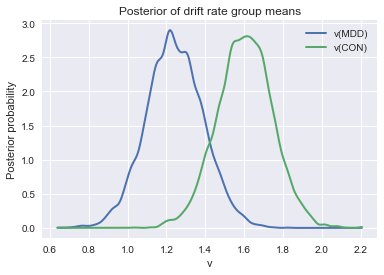

In [171]:
v_MDD, v_CON = sigdep_model.nodes_db.node[['v(MDD)','v(CON)']]
hddm.analyze.plot_posterior_nodes([v_MDD, v_CON])
plt.xlabel('v')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift rate group means')

print ("P_v(MDD > CON) = ", (v_MDD.trace() > v_CON.trace()).mean())
print ("P_v(CON > MDD) = ", (v_CON.trace() > v_MDD.trace()).mean())

**Do any of the parameters correlate with clinical measures?**

In [201]:
# read in the csv with these params
sigdep_standard_params = pd.read_csv('sigdep_standard_params.csv')

In [204]:
sigdep_standard_params.rename(columns={'group_x':'group'}, inplace = True)

No correlations with BDI and a parameter.

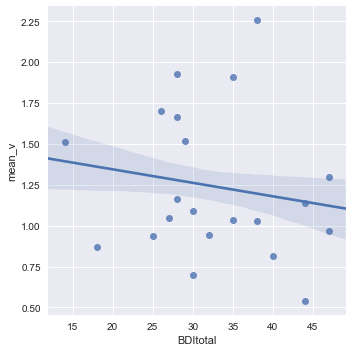

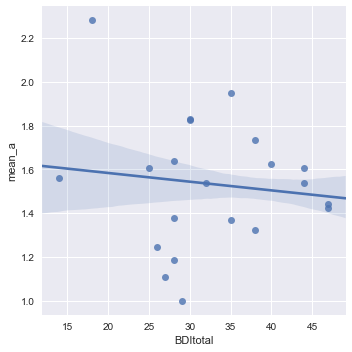

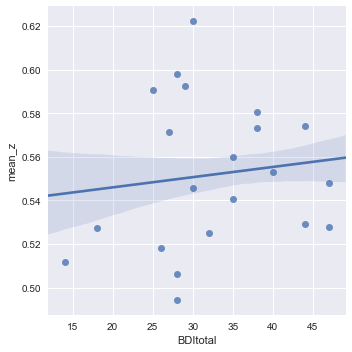

In [205]:
v_bdi = sns.lmplot(y='mean_v', x = 'BDItotal',\
                        data=sigdep_standard_params[sigdep_standard_params.group == 'MDD'], ci=68)

a_bdi = sns.lmplot(y='mean_a', x = 'BDItotal',\
                        data=sigdep_standard_params[sigdep_standard_params.group == 'MDD'], ci=68)

z_bdi = sns.lmplot(y='mean_z', x = 'BDItotal',\
                        data=sigdep_standard_params[sigdep_standard_params.group == 'MDD'], ci=68)

No correlations with anhedonia and a parameter. 

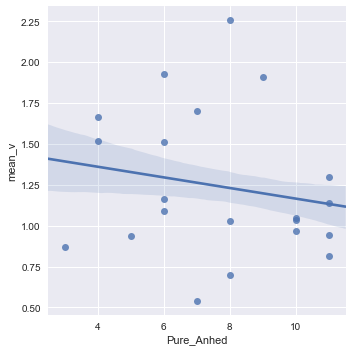

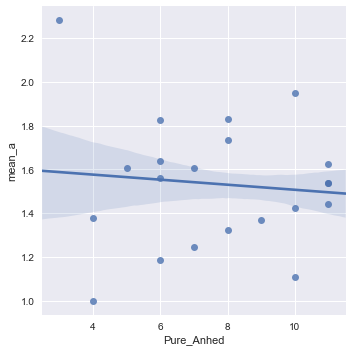

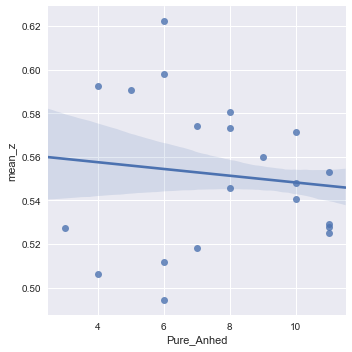

In [208]:
v_anhed = sns.lmplot(y='mean_v', x = 'Pure_Anhed',\
                        data=sigdep_standard_params[sigdep_standard_params.group == 'MDD'], ci=68)

a_anhed = sns.lmplot(y='mean_a', x = 'Pure_Anhed',\
                        data=sigdep_standard_params[sigdep_standard_params.group == 'MDD'], ci=68)

z_anhed = sns.lmplot(y='mean_z', x = 'Pure_Anhed',\
                        data=sigdep_standard_params[sigdep_standard_params.group == 'MDD'], ci=68)

## Response Bias Regression: group and z (starting point bias) predict response bias

In [210]:
# melting this so we can do the regressions with block
prt_params = pd.melt(sigdep_standard_params, id_vars=['subject'], value_vars=['RB_adjst_all1_1',\
                                                                            'RB_adjst_all1_2','RB_adjst_all1_3'])
prt_params['block'] = 0
prt_params.loc[prt_params.variable == 'RB_adjst_all1_1', 'block'] = 1
prt_params.loc[prt_params.variable == 'RB_adjst_all1_2', 'block'] = 2
prt_params.loc[prt_params.variable == 'RB_adjst_all1_3', 'block'] = 3
prt_params.rename(columns={'value': 'response_bias'}, inplace=True)
prt_params_df = prt_params.merge(sigdep_standard_params, on='subject')
prt_params_df.head()

,subject,variable,response_bias,block,Unnamed: 0,to_extract,mean_v,group,date,bias,...,dis_adjst_all1_3,reward_ratio_total,RB_adjst_all1_4,ac1_4,avT1_4,dis_adjst_all1_4,rwdct1_4,mean_a,mean_z,mean_t
0,61,RB_adjst_all1_1,-0.132257,1,0,v_subj(CON).61,2.671083,CON,8/9/2005,long,...,1.126319,3.068966,0.094861,0.948805,459.174072,1.24908,118.0,1.331483,0.51861,0.238898
1,61,RB_adjst_all1_2,0.431505,2,0,v_subj(CON).61,2.671083,CON,8/9/2005,long,...,1.126319,3.068966,0.094861,0.948805,459.174072,1.24908,118.0,1.331483,0.51861,0.238898
2,61,RB_adjst_all1_3,0.161483,3,0,v_subj(CON).61,2.671083,CON,8/9/2005,long,...,1.126319,3.068966,0.094861,0.948805,459.174072,1.24908,118.0,1.331483,0.51861,0.238898
3,62,RB_adjst_all1_1,0.739779,1,1,v_subj(CON).62,1.343760,CON,8/2/2005,long,...,0.613143,2.966667,0.416747,0.827703,984.787170,0.80151,119.0,1.340902,0.58561,0.656459
4,62,RB_adjst_all1_2,0.306658,2,1,v_subj(CON).62,1.343760,CON,8/2/2005,long,...,0.613143,2.966667,0.416747,0.827703,984.787170,0.80151,119.0,1.340902,0.58561,0.656459


In [212]:
%R library(lmerTest)
%Rpush prt_params_df

# make the model with just group
%R rb_reg1.lm = lm(response_bias ~ block + group, data=prt_params_df)
%R rb_reg2.lm = lm(response_bias ~ block*group, data=prt_params_df)

# use anova to compare the two models: no difference so top is better
%R test_models.aov <- anova(rb_reg1.lm, rb_reg2.lm)
%R print(test_models.aov)

Analysis of Variance Table

Model 1: response_bias ~ block + group
Model 2: response_bias ~ block * group
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    105 4.3550                           
2    104 4.3436  1  0.011409 0.2732 0.6023


In [214]:
# compare new model with params to the cell above

%R rb_reg3.lm = lm(response_bias ~ block + group + mean_v + mean_a + mean_z, data=prt_params_df)

# use anova to compare the two models: new model is better
%R test_models_second.aov <- anova(rb_reg1.lm, rb_reg3.lm)
%R print(test_models_second.aov)

Analysis of Variance Table

Model 1: response_bias ~ block + group
Model 2: response_bias ~ block + group + mean_v + mean_a + mean_z
  Res.Df   RSS Df Sum of Sq      F  Pr(>F)   
1    105 4.355                               
2    102 3.756  3   0.59902 5.4224 0.00168 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [215]:
# compare new model with params to the cell above

%R rb_reg4.lm = lm(response_bias ~ block + group*mean_v + mean_a + mean_z, data=prt_params_df)

# use anova to compare the two models: no difference so continue with the first one
%R test_models_first.aov <- anova(rb_reg3.lm, rb_reg4.lm)
%R print(test_models_first.aov)

Analysis of Variance Table

Model 1: response_bias ~ block + group + mean_v + mean_a + mean_z
Model 2: response_bias ~ block + group * mean_v + mean_a + mean_z
  Res.Df    RSS Df Sum of Sq    F Pr(>F)
1    102 3.7560                         
2    101 3.7232  1  0.032809 0.89 0.3477


In [216]:
# compare new model with params to the winning model

%R rb_reg5.lm = lm(response_bias ~ block + group*mean_a + mean_v + mean_z, data=prt_params_df)

# use anova to compare the two models: new is better at trind level, continuing with the earlier model. 
%R test_models_first.aov <- anova(rb_reg3.lm, rb_reg5.lm)
%R print(test_models_first.aov)

Analysis of Variance Table

Model 1: response_bias ~ block + group + mean_v + mean_a + mean_z
Model 2: response_bias ~ block + group * mean_a + mean_v + mean_z
  Res.Df    RSS Df Sum of Sq     F  Pr(>F)  
1    102 3.7560                             
2    101 3.6546  1   0.10146 2.804 0.09712 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [218]:
# compare new model with params to the winning model

%R rb_reg6.lm = lm(response_bias ~ block + group*mean_z + mean_v + mean_a, data=prt_params_df)

# use anova to compare the two models: no difference so the first is the winner (no interactions with group)
%R test_models_first.aov <- anova(rb_reg3.lm, rb_reg6.lm)
%R print(test_models_first.aov)

Analysis of Variance Table

Model 1: response_bias ~ block + group + mean_v + mean_a + mean_z
Model 2: response_bias ~ block + group * mean_z + mean_v + mean_a
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    102 3.7560                           
2    101 3.7434  1  0.012648 0.3413 0.5604


In [219]:
# print the winner
%R print(summary(rb_reg3.lm))


Call:
lm(formula = response_bias ~ block + group + mean_v + mean_a + 
    mean_z, data = prt_params_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.58930 -0.12123 -0.00547  0.11509  0.62854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.56274    0.44298  -1.270 0.206843    
block        0.01114    0.02262   0.493 0.623239    
groupMDD    -0.15782    0.04165  -3.789 0.000256 ***
mean_v      -0.06723    0.04510  -1.491 0.139167    
mean_a      -0.05299    0.08581  -0.617 0.538286    
mean_z       1.76071    0.62296   2.826 0.005666 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1919 on 102 degrees of freedom
Multiple R-squared:  0.2543,	Adjusted R-squared:  0.2178 
F-statistic: 6.958 on 5 and 102 DF,  p-value: 1.252e-05



Plotting parameters and response bias. 


	Pearson's product-moment correlation

data:  sigdep_standard_pararms_forR$mean_v and sigdep_standard_pararms_forR$RB_adjst_all1_4
t = -0.55236, df = 34, p-value = 0.5843
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4101354  0.2417179
sample estimates:
        cor 
-0.09430701 



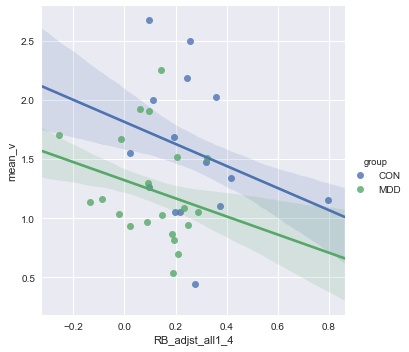

In [287]:
# plotting drift rate and response bias

corr_param = sns.lmplot(y='mean_v', x = 'RB_adjst_all1_4', hue='group',\
                        data=sigdep_standard_params,ci=68)
sigdep_standard_pararms_forR = sigdep_standard_params[['RB_adjst_all1_4','subject','group','mean_v','mean_a', 'mean_z']]
%Rpush sigdep_standard_pararms_forR
%R rb_drift <- cor.test(sigdep_standard_pararms_forR$mean_v,\
                                     sigdep_standard_pararms_forR$RB_adjst_all1_4,method="pearson")
%R print (rb_drift)


	Pearson's product-moment correlation

data:  sigdep_standard_pararms_forR$mean_a and sigdep_standard_pararms_forR$RB_adjst_all1_4
t = -1.4134, df = 34, p-value = 0.1666
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5235864  0.1007608
sample estimates:
       cor 
-0.2355733 



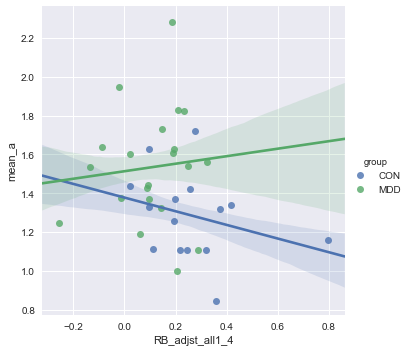

In [249]:
# plotting threshold and response bias

corr_param = sns.lmplot(y='mean_a', x = 'RB_adjst_all1_4', hue='group',\
                        data=sigdep_standard_params,ci=68)
%R rb_threshold <- cor.test(sigdep_standard_pararms_forR$mean_a,\
                                     sigdep_standard_pararms_forR$RB_adjst_all1_4,method="pearson")
%R print (rb_threshold)


	Pearson's product-moment correlation

data:  sigdep_standard_pararms_forR$mean_z and sigdep_standard_pararms_forR$RB_adjst_all1_4
t = 2.7065, df = 34, p-value = 0.01056
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1073223 0.6584708
sample estimates:
      cor 
0.4210134 



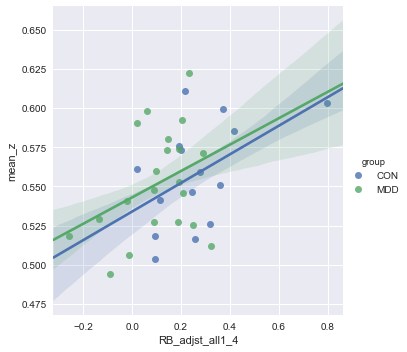

In [250]:
# plotting starting point bias and response bias

corr_param = sns.lmplot(y='mean_z', x = 'RB_adjst_all1_4', hue='group',\
                        data=sigdep_standard_params,ci=68)
%R rb_z <- cor.test(sigdep_standard_pararms_forR$mean_z,\
                                     sigdep_standard_pararms_forR$RB_adjst_all1_4,method="pearson")
%R print (rb_z)

## Discriminability Regressions: drift rate and threshold predict discriminability

In [229]:
prt_params = pd.melt(sigdep_standard_params, id_vars=['subject'], value_vars=['dis_adjst_all1_1',\
                                                                              'dis_adjst_all1_2', 'dis_adjst_all1_3'])
prt_params.loc[prt_params.variable == 'dis_adjst_all1_1', 'block'] = 1
prt_params.loc[prt_params.variable == 'dis_adjst_all1_2', 'block'] = 2
prt_params.loc[prt_params.variable == 'dis_adjst_all1_3', 'block'] = 3
prt_params.rename(columns={'value': 'discriminability'}, inplace=True)
prt_params_df = prt_params.merge(sigdep_standard_params, on='subject')
prt_params_df.head()

,subject,variable,discriminability,block,Unnamed: 0,to_extract,mean_v,group,date,bias,...,dis_adjst_all1_3,reward_ratio_total,RB_adjst_all1_4,ac1_4,avT1_4,dis_adjst_all1_4,rwdct1_4,mean_a,mean_z,mean_t
0,61,dis_adjst_all1_1,1.146497,1.0,0,v_subj(CON).61,2.671083,CON,8/9/2005,long,...,1.126319,3.068966,0.094861,0.948805,459.174072,1.24908,118.0,1.331483,0.51861,0.238898
1,61,dis_adjst_all1_2,1.564130,2.0,0,v_subj(CON).61,2.671083,CON,8/9/2005,long,...,1.126319,3.068966,0.094861,0.948805,459.174072,1.24908,118.0,1.331483,0.51861,0.238898
2,61,dis_adjst_all1_3,1.126319,3.0,0,v_subj(CON).61,2.671083,CON,8/9/2005,long,...,1.126319,3.068966,0.094861,0.948805,459.174072,1.24908,118.0,1.331483,0.51861,0.238898
3,62,dis_adjst_all1_1,1.264542,1.0,1,v_subj(CON).62,1.343760,CON,8/2/2005,long,...,0.613143,2.966667,0.416747,0.827703,984.787170,0.80151,119.0,1.340902,0.58561,0.656459
4,62,dis_adjst_all1_2,0.707580,2.0,1,v_subj(CON).62,1.343760,CON,8/2/2005,long,...,0.613143,2.966667,0.416747,0.827703,984.787170,0.80151,119.0,1.340902,0.58561,0.656459


In [231]:
%R library(lmerTest)
%Rpush prt_params_df

# make the model with just group
%R disc_reg1.lm = lm(discriminability ~ block + group, data=prt_params_df)
%R disc_reg2.lm = lm(discriminability ~ block*group, data=prt_params_df)

# use anova to compare the two models: no difference so take the top
%R test_models.aov <- anova(disc_reg1.lm, disc_reg2.lm)
%R print(test_models.aov)

Analysis of Variance Table

Model 1: discriminability ~ block + group
Model 2: discriminability ~ block * group
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    105 6.6404                           
2    104 6.6362  1 0.0041986 0.0658 0.7981


In [232]:
# compare model with parameters to simpler one from above cell

%R disc_reg3.lm = lm(discriminability ~ block + group + mean_v + mean_a + mean_z, data=prt_params_df)

# use anova to compare the two models: new model with parameters included is better
%R test_models_second.aov <- anova(disc_reg1.lm, disc_reg3.lm)
%R print(test_models_second.aov)

Analysis of Variance Table

Model 1: discriminability ~ block + group
Model 2: discriminability ~ block + group + mean_v + mean_a + mean_z
  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1    105 6.6404                                  
2    102 2.3069  3    4.3335 63.867 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [233]:
# compare new model to above

%R disc_reg4.lm = lm(discriminability ~ block + group*mean_v + mean_a + mean_z, data=prt_params_df)

# use anova to compare the two models: old model is better
%R test_models_second.aov <- anova(disc_reg3.lm, disc_reg4.lm)
%R print(test_models_second.aov)

Analysis of Variance Table

Model 1: discriminability ~ block + group + mean_v + mean_a + mean_z
Model 2: discriminability ~ block + group * mean_v + mean_a + mean_z
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    102 2.3069                           
2    101 2.2982  1 0.0087204 0.3832 0.5373


In [234]:
%R disc_reg5.lm = lm(discriminability ~ block + group*mean_v + group*mean_a + mean_z, data=prt_params_df)

# use anova to compare the two models: old model is better
%R test_models_second.aov <- anova(disc_reg3.lm, disc_reg5.lm)
%R print(test_models_second.aov)

Analysis of Variance Table

Model 1: discriminability ~ block + group + mean_v + mean_a + mean_z
Model 2: discriminability ~ block + group * mean_v + group * mean_a + 
    mean_z
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    102 2.3069                           
2    100 2.2951  2  0.011834 0.2578 0.7733


In [235]:
# compare new model to above

%R disc_reg6.lm = lm(discriminability ~ block + group*mean_v + group*mean_a + group*mean_z, data=prt_params_df)

# use anova to compare the two models: old model is better
%R test_models_second.aov <- anova(disc_reg3.lm, disc_reg6.lm)
%R print(test_models_second.aov)

Analysis of Variance Table

Model 1: discriminability ~ block + group + mean_v + mean_a + mean_z
Model 2: discriminability ~ block + group * mean_v + group * mean_a + 
    group * mean_z
  Res.Df    RSS Df Sum of Sq     F Pr(>F)
1    102 2.3069                          
2     99 2.2194  3  0.087563 1.302 0.2781


In [236]:
# print the summary for the winning model
%R print(summary(disc_reg3.lm))


Call:
lm(formula = discriminability ~ block + group + mean_v + mean_a + 
    mean_z, data = prt_params_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31158 -0.08873 -0.01251  0.08425  0.53292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.332964   0.347164  -0.959    0.340    
block       -0.025710   0.017724  -1.451    0.150    
groupMDD     0.002277   0.032640   0.070    0.945    
mean_v       0.448874   0.035347  12.699  < 2e-16 ***
mean_a       0.342238   0.067249   5.089 1.65e-06 ***
mean_z       0.048181   0.488222   0.099    0.922    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1504 on 102 degrees of freedom
Multiple R-squared:  0.6598,	Adjusted R-squared:  0.6431 
F-statistic: 39.56 on 5 and 102 DF,  p-value: < 2.2e-16




	Pearson's product-moment correlation

data:  sigdep_standard_pararms_forR$mean_v and sigdep_standard_pararms_forR$dis_adjst_all1_4
t = 9.5472, df = 34, p-value = 3.77e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7293878 0.9231290
sample estimates:
      cor 
0.8534188 



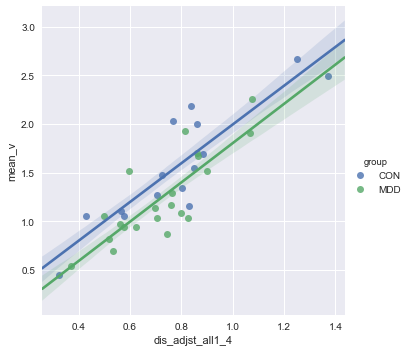

In [294]:
# plotting drift rate and discriminability 
# (:

corr_param = sns.lmplot(y='mean_v', x = 'dis_adjst_all1_4', hue='group',\
                        data=sigdep_standard_params,ci=68)
sigdep_standard_pararms_forR = sigdep_standard_params[['dis_adjst_all1_4','subject','group','mean_v','mean_a', \
                                                       'mean_z','mean_t']]
%Rpush sigdep_standard_pararms_forR
%R drift_disc <- cor.test(sigdep_standard_pararms_forR$mean_v,\
                                     sigdep_standard_pararms_forR$dis_adjst_all1_4,method="pearson")
%R print (drift_disc)


	Pearson's product-moment correlation

data:  sigdep_standard_pararms_forR$mean_a and sigdep_standard_pararms_forR$dis_adjst_all1_4
t = -0.78144, df = 34, p-value = 0.44
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4420721  0.2046381
sample estimates:
       cor 
-0.1328278 



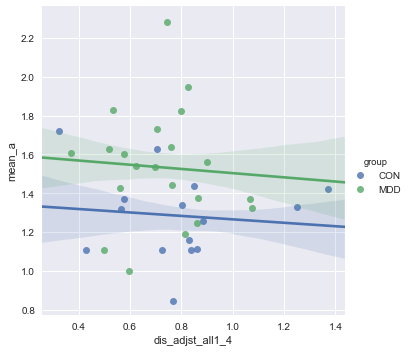

In [246]:
# plotting threshold and discriminability

corr_param = sns.lmplot(y='mean_a', x = 'dis_adjst_all1_4', hue='group',\
                        data=sigdep_standard_params,ci=68)
%R drift_disc <- cor.test(sigdep_standard_pararms_forR$mean_a,\
                                     sigdep_standard_pararms_forR$dis_adjst_all1_4,method="pearson")
%R print (drift_disc)


	Pearson's product-moment correlation

data:  sigdep_standard_pararms_forR$mean_z and sigdep_standard_pararms_forR$dis_adjst_all1_4
t = -1.9805, df = 34, p-value = 0.05578
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.588018976  0.007739067
sample estimates:
       cor 
-0.3216144 



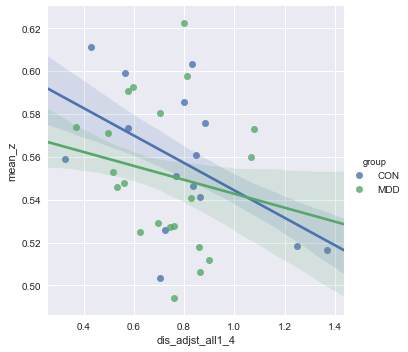

In [247]:
# plotting starting point bias and discriminability

corr_param = sns.lmplot(y='mean_z', x = 'dis_adjst_all1_4', hue='group',\
                        data=sigdep_standard_params,ci=68)
%R drift_disc <- cor.test(sigdep_standard_pararms_forR$mean_z,\
                                     sigdep_standard_pararms_forR$dis_adjst_all1_4,method="pearson")
%R print (drift_disc)

## PPC

Posterior predictive checks. In this section, we are generating data based on the parameters that the hddm model gives us. We can compare this generated data with the real data to see how well the model is capturing our trends. 

**EMBARC**

In [305]:
embarc_model = hddm.load('model_six') # load in the model

In [307]:
gen_data = hddm.utils.post_pred_gen(embarc_model, samples=1) # generate data from this model

 [-----------------100%-----------------] 1176 of 1176 complete in 147.4 sec

In [308]:
# Functions getting the generated data organized

def get_trial_type(item):
    '''Returns the trial type from the genstats() data'''
    if len(item) == 22:
        param = item[13]
    else:
        param = np.nan
    return(param)
def get_id(item):
    '''Returns the id info from the genstats() data'''
    if len(item) == 22:
        sub_id = item[16:22]
    else:
        sub_id = np.nan
    return(sub_id)
def get_block(item):
    '''Returns the id info from the genstats() data'''
    if len(item) == 22:
        sub_id = item[5]
    else:
        sub_id = np.nan
    return(sub_id)
def get_group(item):
    '''Returns the id info from the genstats() data'''
    if len(item) == 22:
        sub_id = item[9:12]
    else:
        sub_id = np.nan
    return(sub_id)

In [309]:
# Getting the data in a workable format
gen_data.to_csv('model_12.csv')
embarc_ppc = pd.read_csv('model_11.csv')
embarc_ppc['stim'] = embarc_ppc.node.apply(get_trial_type)
embarc_ppc['block'] = embarc_ppc.node.apply(get_block)
embarc_ppc.loc[embarc_ppc['stim'] == '1', 'length'] = 'short'
embarc_ppc.loc[embarc_ppc['stim'] == '0', 'length'] = 'long'
embarc_ppc['rt'] = embarc_ppc.rt.apply(np.absolute)
embarc_ppc.rename(columns={'Unnamed: 1': 'sample'}, inplace=True)
embarc_ppc.rename(columns={'Unnamed: 2': 'trial'}, inplace=True)
embarc_ppc['stim_resp'] = ''
embarc_ppc.loc[embarc_ppc['response'] == 1, 'stim_resp'] = 'short'
embarc_ppc.loc[embarc_ppc['response'] == 0, 'stim_resp'] = 'long'
embarc_ppc['ProjectSpecificID'] = embarc_ppc.node.apply(get_id)
embarc_ppc['group'] = embarc_ppc.node.apply(get_group)

In [310]:
embarc_ppc.head()

,node,sample,trial,rt,response,stim,block,length,stim_resp,ProjectSpecificID,group
0,wfpt(1.0.CTL.0).CU0009,0,0,0.845659,0.0,0,1,long,long,CU0009,CTL
1,wfpt(1.0.CTL.0).CU0009,0,1,1.209259,0.0,0,1,long,long,CU0009,CTL
2,wfpt(1.0.CTL.0).CU0009,0,2,0.528559,0.0,0,1,long,long,CU0009,CTL
3,wfpt(1.0.CTL.0).CU0009,0,3,1.053659,0.0,0,1,long,long,CU0009,CTL
4,wfpt(1.0.CTL.0).CU0009,0,4,0.337359,0.0,0,1,long,long,CU0009,CTL


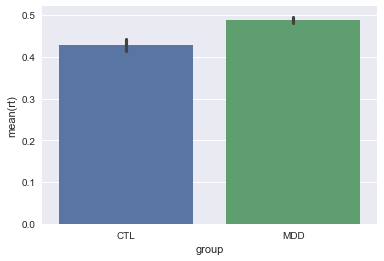

In [312]:
# Great, the generated data is showing that MDDs are slower than controls. 
rt_plot = sns.barplot(y='rt', x = 'group', data=embarc_ppc, \
                      ci=68, units = 'ProjectSpecificID')

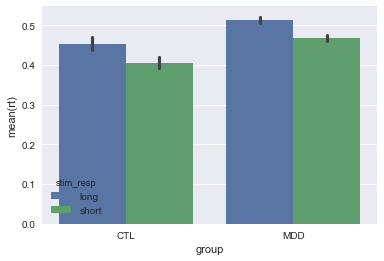

In [313]:
# Great, the generated data is showing that response times for the short mouth are quicker in both groups.
rt_plot = sns.barplot(y='rt', x = 'group', hue = 'stim_resp', data=embarc_ppc, \
                      ci=68, units = 'ProjectSpecificID')

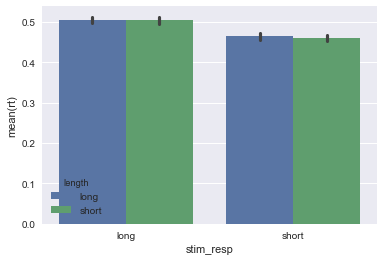

In [315]:
# the PPC data IS showing that rich responses when the lean is on the screen are a little slower, but not as much as in our 
# actual data. If we're thinking that this is where there is some sort of frontal/not perceptual detection happens, 
# maybe it makes sense that the DDM isn't capturing it as much? 

rt_plot = sns.barplot(y='rt', x = 'stim_resp', hue = 'length', data=embarc_ppc, \
                      ci=68, units = 'ProjectSpecificID')

In [317]:
embarc_ppc['accuracy'] = 0
embarc_ppc.loc[embarc_ppc['length'] == embarc_ppc['stim_resp'], 'accuracy'] = 1

In [320]:
embarc_ppc = embarc_ppc.merge(embarc_standard_forR, on='ProjectSpecificID')

In [321]:
# making a column that has each person's mean accuracy
for subject in embarc_ppc.ProjectSpecificID.unique():
    embarc_ppc.loc[embarc_ppc.ProjectSpecificID == subject, 'ppc_accuracy'] =\
    embarc_ppc[embarc_ppc.ProjectSpecificID == subject].accuracy.sum()
# making a column that has each person's mean rt
    embarc_ppc.loc[embarc_ppc.ProjectSpecificID == subject, 'ppc_rt'] =\
    embarc_ppc[embarc_ppc.ProjectSpecificID == subject].rt.mean()
embarc_ppc['ppc_rt'] = embarc_ppc['ppc_rt']*1000

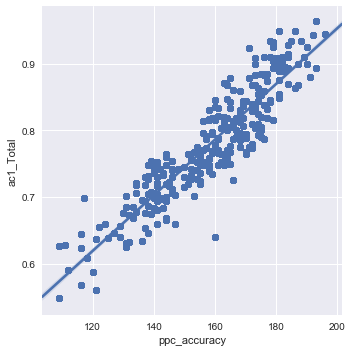

In [323]:
# RT correlation between generated and real data for each participant
corr_param = sns.lmplot(y='ac1_Total', x = 'ppc_accuracy',\
                        data=embarc_ppc,ci=68, units = 'ProjectSpecificID')

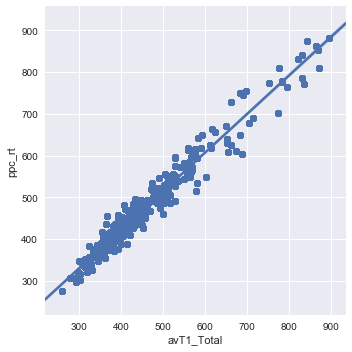

In [322]:
# RT correlation
corr_param = sns.lmplot(y='ppc_rt', x = 'avT1_Total',\
                        data=embarc_ppc,ci=68, units = 'ProjectSpecificID')

**SIGDEP**